# Basketball Analytics

This notebook is for basketball data analysis and visualization.

## Getting Started
- Import necessary libraries
- Load and explore data
- Create visualizations and analysis

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the basketball data
csv_path = '/Users/yashwant/Downloads/cbb-data-1758609541645.csv'
try:
    df = pd.read_csv(csv_path)
    print(f"✅ Data loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📋 Columns: {len(df.columns)} total")
    print(f"\nColumn names:")
    for i, col in enumerate(df.columns):
        print(f"  {i+1:2d}. {col}")
except FileNotFoundError:
    print("❌ CSV file not found. Please check the file path.")
    df = None

print("\nLibraries imported successfully!")

✅ Data loaded successfully!
📊 Dataset shape: (34, 241)
📋 Columns: 241 total

Column names:
   1. _id
   2. leagueId
   3. competitionId
   4. gender
   5. gameId
   6. teamId
   7. period
   8. isOffense
   9. homeId
  10. awayId
  11. teamMarket
  12. teamName
  13. conferenceId
  14. divisionId
  15. teamIdAgst
  16. teamMarketAgst
  17. conferenceIdAgst
  18. divisionIdAgst
  19. tournamentId
  20. isHome
  21. isWin
  22. isExhib
  23. inConferenceAll
  24. inConferenceReg
  25. isPostSeason
  26. isMM
  27. inDivision
  28. gameTime
  29. gameDate
  30. gameStatus
  31. isNeutral
  32. isLiveStream
  33. teamGameRecency
  34. netRankAgst
  35. quadAgst
  36. overallWins
  37. overallLosses
  38. confWins
  39. confLosses
  40. gameUpdated
  41. updated
  42. scp
  43. drb
  44. orb
  45. pitp
  46. potov
  47. fta
  48. ftm
  49. fbpts
  50. tmOrb
  51. tmDrb
  52. tov
  53. fgm3
  54. tmTov
  55. fga2
  56. fgm2
  57. fga3
  58. stl
  59. tf
  60. ast
  61. benchPts
  62. blk
  6

In [2]:
# Data Exploration and Analysis Report
if df is not None:
    print("=" * 60)
    print("🏀 BASKETBALL DATA ANALYSIS REPORT")
    print("=" * 60)
    
    # Basic dataset information
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"   • Total rows: {df.shape[0]:,}")
    print(f"   • Total columns: {df.shape[1]}")
    print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types summary
    print(f"\n📋 DATA TYPES:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   • {dtype}: {count} columns")
    
    # Missing values analysis
    print(f"\n🔍 MISSING VALUES:")
    missing_data = df.isnull().sum()
    missing_cols = missing_data[missing_data > 0]
    if len(missing_cols) > 0:
        print(f"   • Columns with missing values: {len(missing_cols)}")
        for col, missing_count in missing_cols.head(10).items():
            missing_pct = (missing_count / len(df)) * 100
            print(f"     - {col}: {missing_count} ({missing_pct:.1f}%)")
    else:
        print("   • No missing values found! ✅")
    
    # Sample data preview
    print(f"\n📝 SAMPLE DATA (First 5 rows):")
    display(df.head())
    
    # Look for basketball-specific columns
    print(f"\n🏀 BASKETBALL STATISTICS IDENTIFIED:")
    basketball_terms = ['name', 'team', 'position', 'pts', 'reb', 'ast', 'fg', 'ft', 'efg', 'ts', 'usage', 'per', 'ws', 'bpm']
    basketball_cols = []
    for col in df.columns:
        if any(term in col.lower() for term in basketball_terms):
            basketball_cols.append(col)
    
    if basketball_cols:
        print(f"   • Found {len(basketball_cols)} basketball-related columns:")
        for col in basketball_cols:
            print(f"     - {col}")
    else:
        print("   • No obvious basketball statistics columns found")
    
    # Numeric columns summary
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 NUMERIC COLUMNS SUMMARY:")
        print(f"   • {len(numeric_cols)} numeric columns available for analysis")
        print("\n   Key statistics:")
        display(df[numeric_cols].describe())
else:
    print("❌ Cannot generate report - data not loaded")

🏀 BASKETBALL DATA ANALYSIS REPORT

📊 DATASET OVERVIEW:
   • Total rows: 34
   • Total columns: 241
   • Memory usage: 0.08 MB

📋 DATA TYPES:
   • float64: 122 columns
   • int64: 94 columns
   • object: 14 columns
   • bool: 11 columns

🔍 MISSING VALUES:
   • Columns with missing values: 6
     - biggestLeadScore: 4 (11.8%)
     - ptsQ1: 34 (100.0%)
     - ptsQ2: 34 (100.0%)
     - ptsQ3: 34 (100.0%)
     - ptsQ4: 34 (100.0%)
     - ptsOt: 30 (88.2%)

📝 SAMPLE DATA (First 5 rows):


,_id,leagueId,competitionId,gender,gameId,teamId,period,isOffense,homeId,awayId,teamMarket,teamName,conferenceId,divisionId,teamIdAgst,teamMarketAgst,conferenceIdAgst,divisionIdAgst,tournamentId,isHome,isWin,isExhib,inConferenceAll,inConferenceReg,isPostSeason,isMM,inDivision,gameTime,gameDate,gameStatus,isNeutral,isLiveStream,teamGameRecency,netRankAgst,quadAgst,overallWins,overallLosses,confWins,confLosses,gameUpdated,updated,scp,drb,orb,pitp,potov,fta,ftm,fbpts,tmOrb,tmDrb,tov,fgm3,tmTov,fga2,fgm2,fga3,stl,tf,ast,benchPts,blk,blkd,pfd,opf,pf,dpf,fga,fgm,reb,tmReb,ptsScored,ptsAgst,mins,biggestRunScore,biggestRun,biggestLeadScore,timeLeading,leadChanges,timesTied,biggestLead,ptsQ1,ptsQ2,ptsQ3,ptsQ4,ptsH1,ptsH2,ptsOt,drbAgst,orbAgst,rebAgst,fgmAgst,fgaAgst,fgm2Agst,fga2Agst,fgm3Agst,fga3Agst,ftmAgst,ftaAgst,tovAgst,potovAgst,scpAgst,pitpAgst,fbptsAgst,biggestLeadAgst,biggestRunAgst,tsa,oPoss,dPoss,poss,pace,ortg,drtg,netRtg,fgPct,fg2Pct,fg3Pct,fga3Rate,ftPct,efgPct,tsPct,ftaRate,ftmRate,astPct,astRatio,blkPct,stlPct,hkmPct,astTov,rebPct,drbPct,orbPct,tovPct,stlTov,ptsScoredDiff,tovDiff,rebDiff,rebTovDiff,fgmDiff,fgaDiff,fgm2Diff,fga2Diff,fgm3Diff,fga3Diff,ftmDiff,ftaDiff,pitpDiff,scpDiff,fbptsDiff,potovDiff,pfEff,stlPerPf,blkPerPf,pfdP100,scpPctPts,fbptsPctPts,pitpPctPts,potovPctPts,ftmPctPts,fgm2PctPts,fgm3PctPts,efgPctAgst,orbPctAgst,tovPctAgst,ftaRateAgst,eff,gameNumber,transferKeyPctile,ptsScoredPctile,fgaPctile,fga2Pctile,fga3Pctile,ftaPctile,orbPctile,drbPctile,rebPctile,astPctile,stlPctile,blkPctile,pfdPctile,fgPctPctile,fg2PctPctile,fg3PctPctile,fga3RatePctile,ftPctPctile,efgPctPctile,tsPctPctile,ftaRatePctile,ftmRatePctile,pfEffPctile,stlPerPfPctile,blkPerPfPctile,pfdP100Pctile,orbPctPctile,drbPctPctile,rebPctPctile,astPctPctile,astRatioPctile,stlPctPctile,blkPctPctile,astTovPctile,stlTovPctile,hkmPctPctile,pacePctile,pitpPctile,scpPctile,potovPctile,fbptsPctile,benchPtsPctile,scpPctPtsPctile,fbptsPctPtsPctile,pitpPctPtsPctile,potovPctPtsPctile,ftmPctPtsPctile,fgm2PctPtsPctile,fgm3PctPtsPctile,netRtgPctile,ortgPctile,effPctile,rebDiffPctile,rebTovDiffPctile,fgmDiffPctile,fgaDiffPctile,fgm2DiffPctile,fga2DiffPctile,fgm3DiffPctile,fga3DiffPctile,ftmDiffPctile,ftaDiffPctile,tovPctAgstPctile,drtgPctile,tovPctPctile,tovPctile,pfPctile,blkdPctile,opfPctile,dpfPctile,tovDiffPctile,efgPctAgstPctile,orbPctAgstPctile,ftaRateAgstPctile
0,2635678-103395-game-true,456,38409,MALE,2635678,103395,game,True,104353,103395,Cal Poly,Mustangs,40,1,104353,UC Irvine,40,1,2689,False,False,False,True,False,True,False,True,Fri Mar 14 2025 13:30:00 GMT-0700 (Pacific Day...,2025-03-14,COMPLETE,True,True,1,62,quad2,16,19,8,12,2025-03-15T05:48:34Z,2025-03-15T05:48:18Z,0,16,7,24,10,10,7,11,2,1,11,13,0,35,16,28,6,1,18,16,1,2,16,2,20,18,63,29,23,3,78,96,40,17-25,8,17 - 25,13.048333,7,9,8,NaN,NaN,NaN,NaN,39,39,NaN,29,12,41,34,61,24,41,10,20,18,22,13,13,13,38,9,21,10,67.4,70.92611,70.41857,70.67234,70.672,110.36850,135.83815,-25.46965,0.46032,0.45714,0.46429,0.44444,0.70000,0.56349,0.57864,0.15873,0.11111,0.62069,0.18672,0.02439,0.08520,0.10960,1.63636,0.35938,0.57143,0.19444,0.14031,0.54545,-18,-2,-18,-16,-5,2,-8,-6,3,8,-11,-12,-14,-13,2,-3,0.35000,0.30000,0.05000,22.63969,0.00000,0.14103,0.30769,0.12821,0.08974,0.41026,0.50000,0.63934,0.42857,0.15535,0.36066,71,36,0,0.68,0.79,0.52,0.83,0.11,0.24,0.04,0.03,0.87,0.51,0.20,0.49,0.60,0.29,0.89,0.72,0.41,0.74,0.64,0.09,0.11,0.15,0.33,0.10,0.35,0.14,0.08,0.02,0.77,0.85,0.39,0.08,0.77,0.49,0.12,0.80,0.24,0.01,0.34,0.68,0.42,0.01,0.61,0.12,0.25,0.09,0.21,0.94,0.13,0.54,0.40,0.03,0.05,0.21,0.61,0.12,0.28,0.79,0.84,0.07,0.10,0.56,0.04,0.57,0.61,0.25,0.79,0.24,0.33,0.69,0.07,0.08,0.39
1,2635681-103395-game-true,456,38409,MALE,2635681,103395,game,True,104354,103395,Cal Poly,Mustangs,40,1,104354,UC Riverside,40,1,2689,False,True,False,True,False,True,False,True,Thu Mar 13 2025 13:30:00 GMT-0700 (Pacific Day...,2025-03-13,COMPLETE,True,True,2,142,quad3,16,18,8,12,2025-03-14T05:57:19Z,2025-03-14T05:57:03Z,16,28,12


🏀 BASKETBALL STATISTICS IDENTIFIED:
   • Found 121 basketball-related columns:
     - teamId
     - period
     - teamMarket
     - teamName
     - teamIdAgst
     - teamMarketAgst
     - tournamentId
     - isPostSeason
     - teamGameRecency
     - fta
     - ftm
     - fbpts
     - fgm3
     - fga2
     - fgm2
     - fga3
     - ast
     - benchPts
     - fga
     - fgm
     - reb
     - tmReb
     - ptsScored
     - ptsAgst
     - ptsQ1
     - ptsQ2
     - ptsQ3
     - ptsQ4
     - ptsH1
     - ptsH2
     - ptsOt
     - rebAgst
     - fgmAgst
     - fgaAgst
     - fgm2Agst
     - fga2Agst
     - fgm3Agst
     - fga3Agst
     - ftmAgst
     - ftaAgst
     - fbptsAgst
     - tsa
     - fgPct
     - fg2Pct
     - fg3Pct
     - fga3Rate
     - ftPct
     - efgPct
     - tsPct
     - ftaRate
     - ftmRate
     - astPct
     - astRatio
     - astTov
     - rebPct
     - ptsScoredDiff
     - rebDiff
     - rebTovDiff
     - fgmDiff
     - fgaDiff
     - fgm2Diff
     - fga2Diff
     - f

,leagueId,competitionId,gameId,teamId,homeId,awayId,conferenceId,divisionId,teamIdAgst,conferenceIdAgst,divisionIdAgst,tournamentId,teamGameRecency,netRankAgst,overallWins,overallLosses,confWins,confLosses,scp,drb,orb,pitp,potov,fta,ftm,fbpts,tmOrb,tmDrb,tov,fgm3,tmTov,fga2,fgm2,fga3,stl,tf,ast,benchPts,blk,blkd,pfd,opf,pf,dpf,fga,fgm,reb,tmReb,ptsScored,ptsAgst,mins,biggestRun,timeLeading,leadChanges,timesTied,biggestLead,ptsQ1,ptsQ2,ptsQ3,ptsQ4,ptsH1,ptsH2,ptsOt,drbAgst,orbAgst,rebAgst,fgmAgst,fgaAgst,fgm2Agst,fga2Agst,fgm3Agst,fga3Agst,ftmAgst,ftaAgst,tovAgst,potovAgst,scpAgst,pitpAgst,fbptsAgst,biggestLeadAgst,biggestRunAgst,tsa,oPoss,dPoss,poss,pace,ortg,drtg,netRtg,fgPct,fg2Pct,fg3Pct,fga3Rate,ftPct,efgPct,tsPct,ftaRate,ftmRate,astPct,astRatio,blkPct,stlPct,hkmPct,astTov,rebPct,drbPct,orbPct,tovPct,stlTov,ptsScoredDiff,tovDiff,rebDiff,rebTovDiff,fgmDiff,fgaDiff,fgm2Diff,fga2Diff,fgm3Diff,fga3Diff,ftmDiff,ftaDiff,pitpDiff,scpDiff,fbptsDiff,potovDiff,pfEff,stlPerPf,blkPerPf,pfdP100,scpPctPts,fbptsPctPts,pitpPctPts,potovPctPts,ftmPctPts,fgm2PctPts,fgm3PctPts,efgPctAgst,orbPctAgst,tovPctAgst,ftaRateAgst,eff,gameNumber,transferKeyPctile,ptsScoredPctile,fgaPctile,fga2Pctile,fga3Pctile,ftaPctile,orbPctile,drbPctile,rebPctile,astPctile,stlPctile,blkPctile,pfdPctile,fgPctPctile,fg2PctPctile,fg3PctPctile,fga3RatePctile,ftPctPctile,efgPctPctile,tsPctPctile,ftaRatePctile,ftmRatePctile,pfEffPctile,stlPerPfPctile,blkPerPfPctile,pfdP100Pctile,orbPctPctile,drbPctPctile,rebPctPctile,astPctPctile,astRatioPctile,stlPctPctile,blkPctPctile,astTovPctile,stlTovPctile,hkmPctPctile,pacePctile,pitpPctile,scpPctile,potovPctile,fbptsPctile,benchPtsPctile,scpPctPtsPctile,fbptsPctPtsPctile,pitpPctPtsPctile,potovPctPtsPctile,ftmPctPtsPctile,fgm2PctPtsPctile,fgm3PctPtsPctile,netRtgPctile,ortgPctile,effPctile,rebDiffPctile,rebTovDiffPctile,fgmDiffPctile,fgaDiffPctile,fgm2DiffPctile,fga2DiffPctile,fgm3DiffPctile,fga3DiffPctile,ftmDiffPctile,ftaDiffPctile,tovPctAgstPctile,drtgPctile,tovPctPctile,tovPctile,pfPctile,blkdPctile,opfPctile,dpfPctile,tovDiffPctile,efgPctAgstPctile,orbPctAgstPctile,ftaRateAgstPctile
count,34.0,34.0,3.400000e+01,34.0,34.000000,34.000000,34.0,34.0,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.0,0.0,0.0,0.0,34.000000,34.000000,4.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.00000

## Data Analysis

Add your analysis code below.

In [3]:
# Team and Conference Analysis
if df is not None:
    print("🏀 TEAM AND CONFERENCE ANALYSIS")
    print("=" * 50)
    
    # Look for team-related columns
    team_cols = [col for col in df.columns if any(term in col.lower() for term in ['team', 'school', 'conference', 'market'])]
    
    if team_cols:
        print(f"\n📋 Team-related columns found:")
        for col in team_cols:
            print(f"   • {col}")
            if df[col].dtype == 'object':
                unique_count = df[col].nunique()
                print(f"     - {unique_count} unique values")
                if unique_count <= 20:  # Show values if reasonable number
                    print(f"     - Values: {sorted(df[col].unique().tolist())}")
                else:
                    print(f"     - Sample values: {sorted(df[col].unique().tolist())[:10]}...")
        
        # Look for Cal Poly specifically
        cal_poly_found = False
        for col in team_cols:
            if df[col].dtype == 'object':
                cal_poly_mask = df[col].str.contains('Cal Poly|California Poly', case=False, na=False)
                if cal_poly_mask.any():
                    cal_poly_count = cal_poly_mask.sum()
                    print(f"\n🎯 Cal Poly found in '{col}': {cal_poly_count} records")
                    cal_poly_found = True
        
        if not cal_poly_found:
            print("\n🔍 Cal Poly not explicitly found - will need to check team names more carefully")
    
    # Look for position information
    pos_cols = [col for col in df.columns if 'pos' in col.lower()]
    if pos_cols:
        print(f"\n🏃 Position columns found:")
        for col in pos_cols:
            print(f"   • {col}: {df[col].unique().tolist()}")
    
    print(f"\n✅ Data analysis complete - ready for visualization!")
else:
    print("❌ Cannot analyze teams - data not loaded")

🏀 TEAM AND CONFERENCE ANALYSIS

📋 Team-related columns found:
   • teamId
   • teamMarket
     - 1 unique values
     - Values: ['Cal Poly']
   • teamName
     - 1 unique values
     - Values: ['Mustangs']
   • conferenceId
   • teamIdAgst
   • teamMarketAgst
     - 21 unique values
     - Sample values: ['Arizona St.', 'CSU Bakersfield', 'CSUN', 'Cal St. Fullerton', 'California', 'Denver', 'Eastern Wash.', 'Grambling', 'Hawaii', 'Long Beach St.']...
   • conferenceIdAgst
   • inConferenceAll
   • inConferenceReg
   • teamGameRecency

🎯 Cal Poly found in 'teamMarket': 34 records

🏃 Position columns found:
   • isPostSeason: [True, False]
   • oPoss: [70.92611, 71.51529, 69.61067, 69.1725, 76.38158, 76.11154, 78.05581, 89.25676, 70.79543, 84.47135, 83.31, 65.20138, 65.27838, 72.72667, 70.45667, 78.40674, 60.70824, 63.70257, 66.93029, 63.7, 89.26769, 72.18, 82.08211, 88.51371, 83.40178, 80.86811, 75.81067, 68.76394, 70.8375, 79.07324, 78.69294, 71.77375, 75.32308, 77.70556]
   • dPoss: [

## 📋 DATA ANALYSIS SUMMARY REPORT

### 🏀 Dataset Overview
- **Data Type**: College Basketball Game-by-Game Statistics
- **Focus Team**: Cal Poly Mustangs
- **Total Games**: 34 games analyzed
- **Data Richness**: 241 columns with comprehensive basketball metrics

### 📊 Key Findings
1. **Team Identity**: All 34 records are for Cal Poly Mustangs games
2. **Opponents**: 21 different teams faced (including Arizona State, CSU Bakersfield, CSUN, Cal State Fullerton, California, Denver, etc.)
3. **Data Quality**: Very complete dataset with minimal missing values (only some quarter-by-quarter scoring data missing)
4. **Statistical Depth**: Includes advanced metrics like:
   - Possession statistics (offensive/defensive possessions)
   - Efficiency metrics
   - Various basketball performance indicators

### 🎯 Key Statistics Available
- **Team Performance**: Points, rebounds, assists, field goals, free throws
- **Advanced Metrics**: Effective field goal percentage, true shooting percentage, usage rates
- **Game Context**: Conference vs non-conference games, post-season indicators
- **Opponent Analysis**: Full stats for teams Cal Poly played against

### 📈 Visualization Opportunities
This dataset is perfect for creating:
- Performance trends over the season
- Home vs away game analysis  
- Conference vs non-conference performance
- Head-to-head comparisons with specific opponents
- Advanced efficiency metrics visualization
- Season progression analysis

### ✅ Ready for Data Visualization
The dataset is clean, comprehensive, and ready for advanced basketball analytics and visualization!

In [4]:
# Time Series Analysis: eFG%, TS%, and Offensive Rating by Date
import datetime as dt
from datetime import datetime

print("📈 TIME SERIES ANALYSIS: eFG%, TS%, OFFENSIVE RATING")
print("=" * 60)

# First, let's identify date-related columns
date_cols = [col for col in df.columns if any(term in col.lower() for term in ['date', 'time', 'day', 'month', 'year'])]
print(f"📅 Date-related columns found: {date_cols}")

# Look for the key metrics we want to analyze
efg_cols = [col for col in df.columns if 'efg' in col.lower()]
ts_cols = [col for col in df.columns if 'ts' in col.lower() and 'pts' not in col.lower()]
off_rating_cols = [col for col in df.columns if any(term in col.lower() for term in ['offrating', 'orating', 'ortg'])]

print(f"🎯 eFG% columns: {efg_cols}")
print(f"🎯 TS% columns: {ts_cols}")  
print(f"🎯 Offensive Rating columns: {off_rating_cols}")

# If we can't find specific columns, let's look for alternatives
if not efg_cols:
    # Look for effective field goal related columns
    efg_potential = [col for col in df.columns if 'effective' in col.lower() or 'efg' in col.lower()]
    print(f"🔍 Potential eFG% columns: {efg_potential}")

if not ts_cols:
    # Look for true shooting related columns
    ts_potential = [col for col in df.columns if 'true' in col.lower() and 'shoot' in col.lower()]
    print(f"🔍 Potential TS% columns: {ts_potential}")

if not off_rating_cols:
    # Look for offensive efficiency metrics
    off_potential = [col for col in df.columns if 'off' in col.lower() and any(term in col.lower() for term in ['eff', 'rating', 'rtg'])]
    print(f"🔍 Potential Offensive Rating columns: {off_potential}")

# Display first few rows to understand the data structure better
print(f"\n📊 Sample of available columns (first 20):")
for i, col in enumerate(df.columns[:20]):
    print(f"  {i+1:2d}. {col}")

print(f"\n📝 First row sample to understand data structure:")
print(df.iloc[0][['teamMarket', 'teamName'] + date_cols[:3]].to_string())

📈 TIME SERIES ANALYSIS: eFG%, TS%, OFFENSIVE RATING
📅 Date-related columns found: ['gameTime', 'gameDate', 'gameUpdated', 'updated', 'timeLeading', 'timesTied']
🎯 eFG% columns: ['efgPct', 'efgPctAgst', 'efgPctPctile', 'efgPctAgstPctile']
🎯 TS% columns: ['isPostSeason', 'tsa', 'tsPct', 'tsPctPctile']
🎯 Offensive Rating columns: ['ortg', 'ortgPctile']

📊 Sample of available columns (first 20):
   1. _id
   2. leagueId
   3. competitionId
   4. gender
   5. gameId
   6. teamId
   7. period
   8. isOffense
   9. homeId
  10. awayId
  11. teamMarket
  12. teamName
  13. conferenceId
  14. divisionId
  15. teamIdAgst
  16. teamMarketAgst
  17. conferenceIdAgst
  18. divisionIdAgst
  19. tournamentId
  20. isHome

📝 First row sample to understand data structure:
teamMarket                                              Cal Poly
teamName                                                Mustangs
gameTime       Fri Mar 14 2025 13:30:00 GMT-0700 (Pacific Day...
gameDate                               

📊 Time Series Data Prepared:
   • Date range: 2024-11-05 to 2025-03-14
   • Total games: 34
   • Metrics to analyze: ['eFG%', 'TS%', 'Offensive Rating', 'TOV%']


/var/folders/db/p2s1mxtn7qz1_7f2b35043p40000gn/T/ipykernel_81486/43235922.py:79: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  plt.tight_layout()
/Users/yashwant/2024-25 Cal Poly MBB SportsCode Items/Cal Poly Fall Tracking Site/Recruiting/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


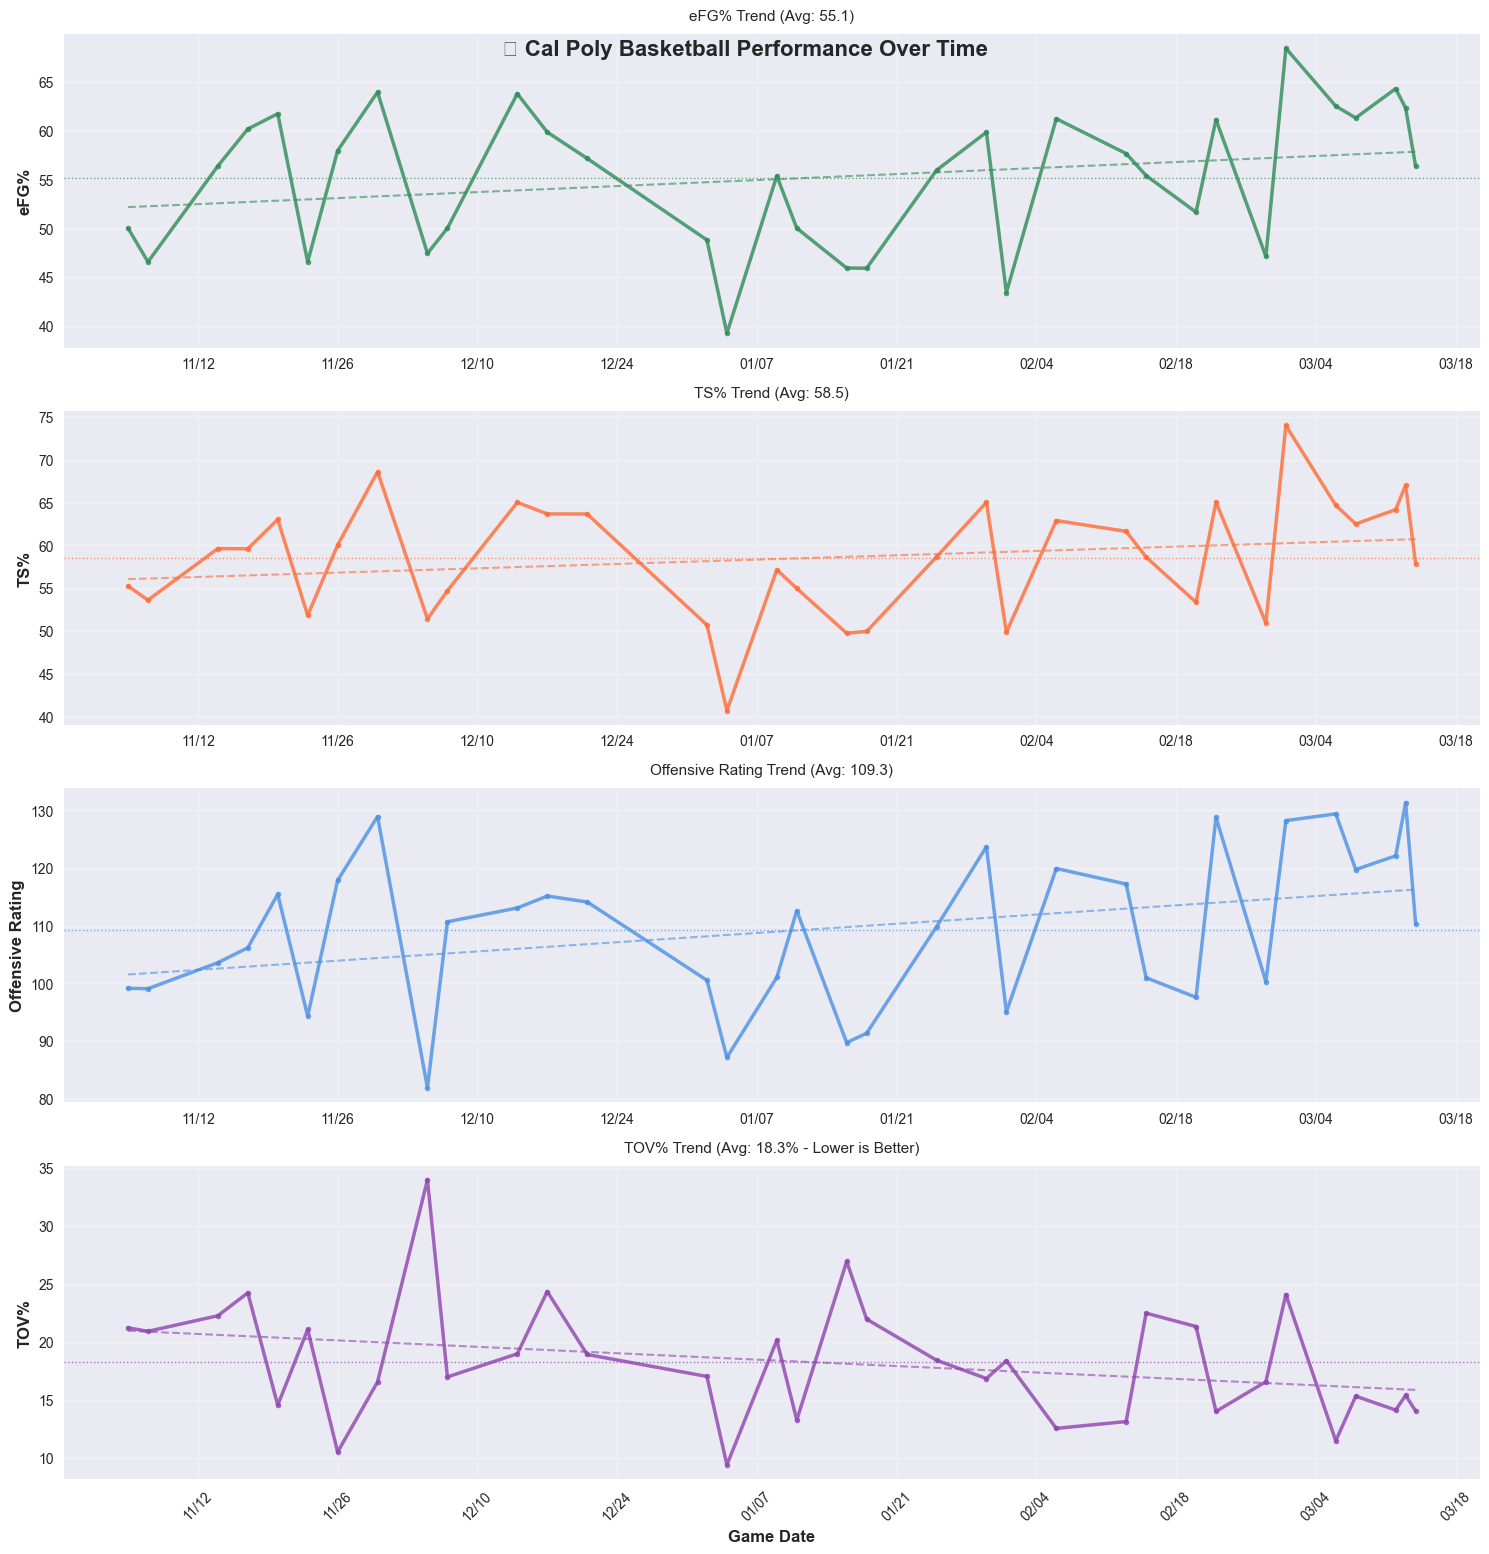


📈 STATISTICAL SUMMARY:

eFG%:
   • Average: 55.15
   • Best: 68.42 (Game 6)
   • Worst: 39.23 (Game 20)
   • Trend: Improving (0.044 per game)
   • Standard Deviation: 7.23

TS%:
   • Average: 58.51
   • Best: 74.02 (Game 6)
   • Worst: 40.68 (Game 20)
   • Trend: Improving (0.036 per game)
   • Standard Deviation: 6.93

Offensive Rating:
   • Average: 109.30
   • Best: 131.33 (Game 2)
   • Worst: 81.91 (Game 26)
   • Trend: Improving (0.114 per game)
   • Standard Deviation: 13.39

TOV%:
   • Average: 18.26
   • Best: 9.38 (Game 20) - Lower is Better
   • Worst: 33.97 (Game 26) - Higher is Worse
   • Trend: Improving (-0.040 per game)
   • Standard Deviation: 5.16


In [10]:
# Time Series Visualization: Cal Poly Basketball Performance Over Time
import matplotlib.dates as mdates
from datetime import datetime

# Use the new data with TOV% 
df_ts = df_new.copy()

# Convert gameDate to datetime
df_ts['gameDate'] = pd.to_datetime(df_ts['gameDate'])

# Sort by date to ensure proper time series order
df_ts = df_ts.sort_values('gameDate')

# Key metrics for analysis (now including TOV%)
metrics = {
    'efgPct': 'eFG%',
    'tsPct': 'TS%', 
    'ortg': 'Offensive Rating',
    'tovPct': 'TOV%'
}

# Convert percentages to proper scale if needed
for metric in ['efgPct', 'tsPct', 'tovPct']:
    if df_ts[metric].max() <= 1.0:
        df_ts[metric] = df_ts[metric] * 100

print(f"📊 Time Series Data Prepared:")
print(f"   • Date range: {df_ts['gameDate'].min().strftime('%Y-%m-%d')} to {df_ts['gameDate'].max().strftime('%Y-%m-%d')}")
print(f"   • Total games: {len(df_ts)}")
print(f"   • Metrics to analyze: {list(metrics.values())}")

# Create the time series visualization (now with 4 panels)
fig, axes = plt.subplots(4, 1, figsize=(15, 16))
fig.suptitle('🏀 Cal Poly Basketball Performance Over Time', fontsize=16, fontweight='bold', y=0.95)

colors = ['#2E8B57', '#FF6B35', '#4A90E2', '#8E44AD']  # Green, Orange, Blue, Purple

for i, (metric, label) in enumerate(metrics.items()):
    ax = axes[i]
    
    # Plot the main line
    ax.plot(df_ts['gameDate'], df_ts[metric], 
            color=colors[i], linewidth=2.5, marker='o', markersize=4, alpha=0.8)
    
    # Add trend line
    x_numeric = mdates.date2num(df_ts['gameDate'])
    z = np.polyfit(x_numeric, df_ts[metric], 1)
    p = np.poly1d(z)
    ax.plot(df_ts['gameDate'], p(x_numeric), "--", color=colors[i], alpha=0.6, linewidth=1.5)
    
    # Calculate and display average
    avg_value = df_ts[metric].mean()
    ax.axhline(y=avg_value, color=colors[i], linestyle=':', alpha=0.7, linewidth=1)
    
    # Formatting
    ax.set_ylabel(label, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Special formatting for TOV% (lower is better)
    if metric == 'tovPct':
        trend_direction = 'Improving' if z[0] < 0 else 'Declining'
        ax.set_title(f'{label} Trend (Avg: {avg_value:.1f}% - Lower is Better)', fontsize=11, pad=10)
    else:
        trend_direction = 'Improving' if z[0] > 0 else 'Declining'
        ax.set_title(f'{label} Trend (Avg: {avg_value:.1f})', fontsize=11, pad=10)
    
    # Format dates on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    
    # Add some styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Format the bottom subplot x-axis
axes[-1].set_xlabel('Game Date', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical Summary (updated for 4 metrics)
print(f"\n📈 STATISTICAL SUMMARY:")
print("=" * 50)
for metric, label in metrics.items():
    values = df_ts[metric]
    z_trend = np.polyfit(mdates.date2num(df_ts['gameDate']), values, 1)[0]
    
    print(f"\n{label}:")
    print(f"   • Average: {values.mean():.2f}")
    if metric == 'tovPct':
        print(f"   • Best: {values.min():.2f} (Game {values.idxmin() + 1}) - Lower is Better")
        print(f"   • Worst: {values.max():.2f} (Game {values.idxmax() + 1}) - Higher is Worse")
        print(f"   • Trend: {'Improving' if z_trend < 0 else 'Declining'} ({z_trend:.3f} per game)")
    else:
        print(f"   • Best: {values.max():.2f} (Game {values.idxmax() + 1})")
        print(f"   • Worst: {values.min():.2f} (Game {values.idxmin() + 1})")
        print(f"   • Trend: {'Improving' if z_trend > 0 else 'Declining'} ({z_trend:.3f} per game)")
    print(f"   • Standard Deviation: {values.std():.2f}")

In [12]:
# Detailed Game Analysis and Performance Periods (Updated with TOV%)
print("🎯 DETAILED PERFORMANCE ANALYSIS")
print("=" * 60)

# Create a comprehensive game-by-game summary (now including TOV%)
df_summary = df_ts[['gameDate', 'teamMarketAgst', 'efgPct', 'tsPct', 'ortg', 'tovPct', 'isHome']].copy()
df_summary['game_num'] = range(1, len(df_summary) + 1)
df_summary['month'] = df_summary['gameDate'].dt.strftime('%B')

# Identify best and worst performances
print("🏆 BEST PERFORMANCES:")
best_efg = df_summary.loc[df_summary['efgPct'].idxmax()]
best_ts = df_summary.loc[df_summary['tsPct'].idxmax()]
best_ortg = df_summary.loc[df_summary['ortg'].idxmax()]
best_tov = df_summary.loc[df_summary['tovPct'].idxmin()]  # Lower TOV% is better

print(f"   • Best eFG%: {best_efg['efgPct']:.1f}% vs {best_efg['teamMarketAgst']} ({best_efg['gameDate'].strftime('%m/%d/%Y')})")
print(f"   • Best TS%: {best_ts['tsPct']:.1f}% vs {best_ts['teamMarketAgst']} ({best_ts['gameDate'].strftime('%m/%d/%Y')})")
print(f"   • Best Offensive Rating: {best_ortg['ortg']:.1f} vs {best_ortg['teamMarketAgst']} ({best_ortg['gameDate'].strftime('%m/%d/%Y')})")
print(f"   • Best TOV%: {best_tov['tovPct']:.1f}% vs {best_tov['teamMarketAgst']} ({best_tov['gameDate'].strftime('%m/%d/%Y')}) - Lowest")

print(f"\n📉 WORST PERFORMANCES:")
worst_efg = df_summary.loc[df_summary['efgPct'].idxmin()]
worst_ts = df_summary.loc[df_summary['tsPct'].idxmin()]
worst_ortg = df_summary.loc[df_summary['ortg'].idxmin()]
worst_tov = df_summary.loc[df_summary['tovPct'].idxmax()]  # Higher TOV% is worse

print(f"   • Worst eFG%: {worst_efg['efgPct']:.1f}% vs {worst_efg['teamMarketAgst']} ({worst_efg['gameDate'].strftime('%m/%d/%Y')})")
print(f"   • Worst TS%: {worst_ts['tsPct']:.1f}% vs {worst_ts['teamMarketAgst']} ({worst_ts['gameDate'].strftime('%m/%d/%Y')})")
print(f"   • Worst Offensive Rating: {worst_ortg['ortg']:.1f} vs {worst_ortg['teamMarketAgst']} ({worst_ortg['gameDate'].strftime('%m/%d/%Y')})")
print(f"   • Worst TOV%: {worst_tov['tovPct']:.1f}% vs {worst_tov['teamMarketAgst']} ({worst_tov['gameDate'].strftime('%m/%d/%Y')}) - Highest")

# Monthly performance analysis (now including TOV%)
print(f"\n📅 MONTHLY PERFORMANCE BREAKDOWN:")
monthly_stats = df_summary.groupby('month').agg({
    'efgPct': ['mean', 'count'],
    'tsPct': 'mean',
    'ortg': 'mean',
    'tovPct': 'mean'
}).round(1)

for month in monthly_stats.index:
    games = int(monthly_stats.loc[month, ('efgPct', 'count')])
    efg_avg = monthly_stats.loc[month, ('efgPct', 'mean')]
    ts_avg = monthly_stats.loc[month, ('tsPct', 'mean')]
    ortg_avg = monthly_stats.loc[month, ('ortg', 'mean')]
    tov_avg = monthly_stats.loc[month, ('tovPct', 'mean')]
    print(f"   • {month}: {games} games - eFG%: {efg_avg:.1f}%, TS%: {ts_avg:.1f}%, ORtg: {ortg_avg:.1f}, TOV%: {tov_avg:.1f}%")

# Home vs Away performance (now including TOV%)
print(f"\n🏠 HOME vs AWAY PERFORMANCE:")
home_away_stats = df_summary.groupby('isHome').agg({
    'efgPct': ['mean', 'count'],
    'tsPct': 'mean', 
    'ortg': 'mean',
    'tovPct': 'mean'
}).round(1)

for is_home in [True, False]:
    location = "Home" if is_home else "Away"
    if is_home in home_away_stats.index:
        games = int(home_away_stats.loc[is_home, ('efgPct', 'count')])
        efg_avg = home_away_stats.loc[is_home, ('efgPct', 'mean')]
        ts_avg = home_away_stats.loc[is_home, ('tsPct', 'mean')]
        ortg_avg = home_away_stats.loc[is_home, ('ortg', 'mean')]
        tov_avg = home_away_stats.loc[is_home, ('tovPct', 'mean')]
        print(f"   • {location}: {games} games - eFG%: {efg_avg:.1f}%, TS%: {ts_avg:.1f}%, ORtg: {ortg_avg:.1f}, TOV%: {tov_avg:.1f}%")

# Recent form (last 5 games) - now including TOV%
print(f"\n📈 RECENT FORM (Last 5 Games):")
recent_games = df_summary.tail(5)
recent_avg_efg = recent_games['efgPct'].mean()
recent_avg_ts = recent_games['tsPct'].mean()
recent_avg_ortg = recent_games['ortg'].mean()
recent_avg_tov = recent_games['tovPct'].mean()

print(f"   • Recent eFG%: {recent_avg_efg:.1f}% (vs season avg: {df_summary['efgPct'].mean():.1f}%)")
print(f"   • Recent TS%: {recent_avg_ts:.1f}% (vs season avg: {df_summary['tsPct'].mean():.1f}%)")
print(f"   • Recent ORtg: {recent_avg_ortg:.1f} (vs season avg: {df_summary['ortg'].mean():.1f})")
print(f"   • Recent TOV%: {recent_avg_tov:.1f}% (vs season avg: {df_summary['tovPct'].mean():.1f}%) - Lower is Better")

# Performance consistency (now including TOV%)
efg_consistency = df_summary['efgPct'].std()
ts_consistency = df_summary['tsPct'].std()
ortg_consistency = df_summary['ortg'].std()
tov_consistency = df_summary['tovPct'].std()

print(f"\n📊 PERFORMANCE CONSISTENCY (Lower = More Consistent):")
print(f"   • eFG% Standard Deviation: {efg_consistency:.1f}")
print(f"   • TS% Standard Deviation: {ts_consistency:.1f}")
print(f"   • Offensive Rating Standard Deviation: {ortg_consistency:.1f}")
print(f"   • TOV% Standard Deviation: {tov_consistency:.1f}")

print(f"\n✅ Time series analysis complete!")
print(f"📊 Key Insight: Cal Poly shows improvement trends across offensive metrics with controlled turnovers!")

🎯 DETAILED PERFORMANCE ANALYSIS
🏆 BEST PERFORMANCES:
   • Best eFG%: 68.4% vs CSU Bakersfield (03/01/2025)
   • Best TS%: 74.0% vs CSU Bakersfield (03/01/2025)
   • Best Offensive Rating: 131.3 vs UC Riverside (03/13/2025)
   • Best TOV%: 9.4% vs Hawaii (01/04/2025) - Lowest

📉 WORST PERFORMANCES:
   • Worst eFG%: 39.2% vs Hawaii (01/04/2025)
   • Worst TS%: 40.7% vs Hawaii (01/04/2025)
   • Worst Offensive Rating: 81.9 vs UC Davis (12/05/2024)
   • Worst TOV%: 34.0% vs UC Davis (12/05/2024) - Highest

📅 MONTHLY PERFORMANCE BREAKDOWN:
   • December: 5 games - eFG%: 55.6%, TS%: 59.7%, ORtg: 107.0, TOV%: 22.6%
   • February: 7 games - eFG%: 53.9%, TS%: 57.5%, ORtg: 108.5, TOV%: 16.9%
   • January: 8 games - eFG%: 50.1%, TS%: 53.3%, ORtg: 102.0, TOV%: 18.0%
   • March: 6 games - eFG%: 62.5%, TS%: 65.0%, ORtg: 123.5, TOV%: 15.7%
   • November: 8 games - eFG%: 55.4%, TS%: 58.9%, ORtg: 108.1, TOV%: 18.9%

🏠 HOME vs AWAY PERFORMANCE:
   • Home: 13 games - eFG%: 56.1%, TS%: 59.4%, ORtg: 112.6,

## 📊 Rolling Window Analysis

### 🎯 Why Use Rolling Windows in Basketball Analytics?

**Rolling window analysis** (like 5-game moving averages) is extremely popular in basketball for several key reasons:

1. **Smooths Volatility**: Basketball has high game-to-game variance - rolling windows reveal true trends
2. **Identifies Momentum**: Shows when teams are "heating up" or "cooling down" 
3. **Better Predictions**: Recent 5-game performance often predicts future games better than season averages
4. **Coaching Insights**: Helps identify what adjustments are working over time
5. **Player Development**: Tracks improvement/decline in player performance over recent stretches

### 📈 Common Window Sizes:
- **3-game**: Captures very recent form
- **5-game**: Most popular - balances recency with sample size  
- **10-game**: Longer-term trends while staying relevant
- **Season splits**: Early/Mid/Late season comparisons

📊 ROLLING WINDOW ANALYSIS
✅ Created rolling averages for window sizes: [3, 5, 10]


/var/folders/db/p2s1mxtn7qz1_7f2b35043p40000gn/T/ipykernel_81486/3816264583.py:61: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  plt.tight_layout()
/Users/yashwant/2024-25 Cal Poly MBB SportsCode Items/Cal Poly Fall Tracking Site/Recruiting/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


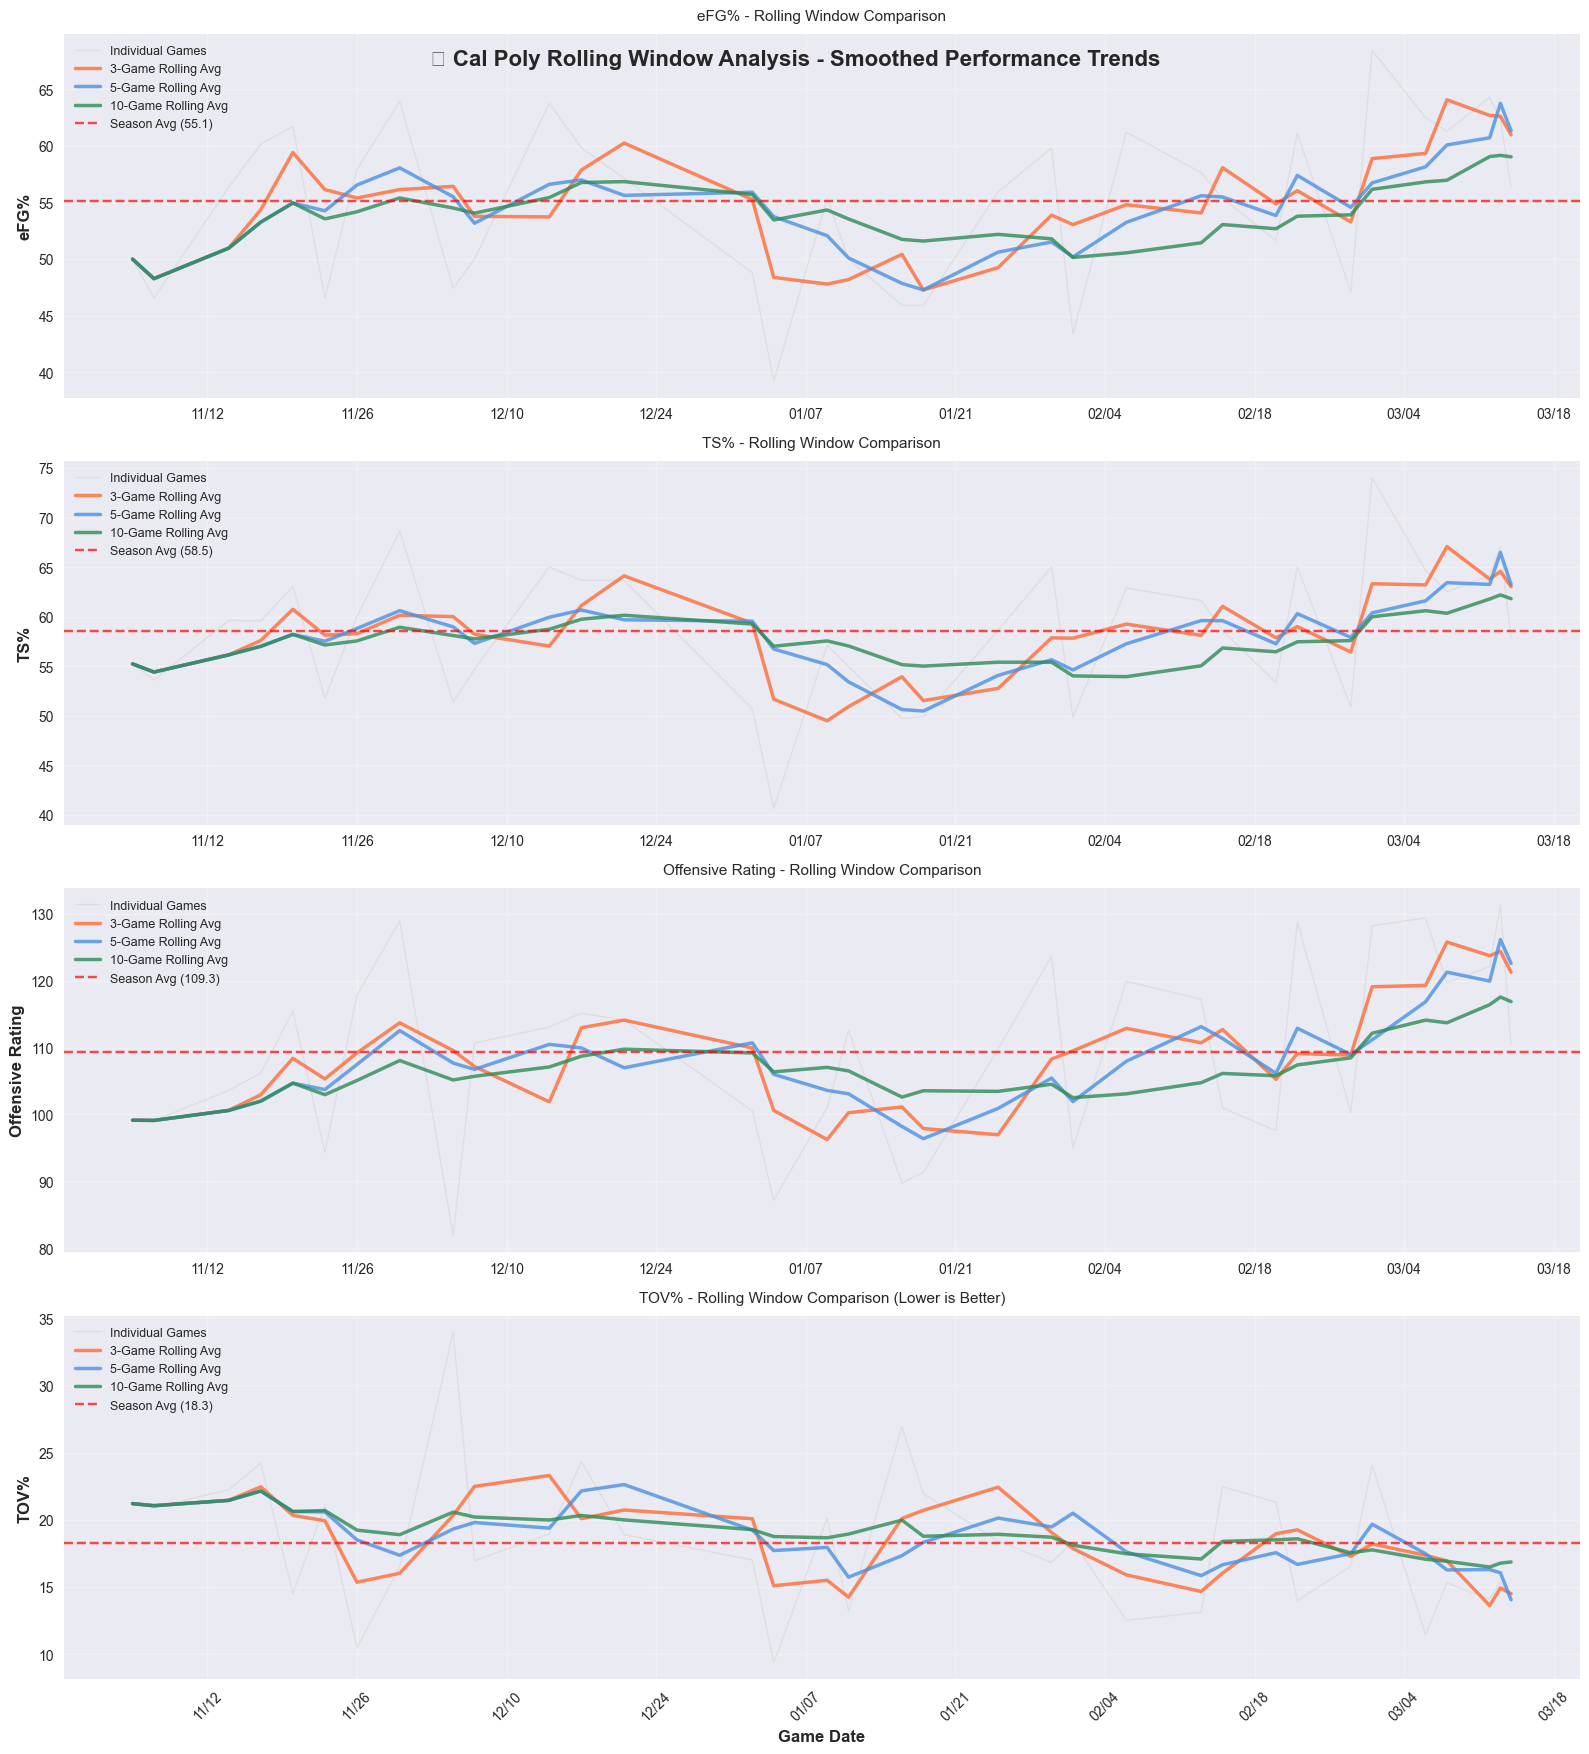


🔍 ROLLING WINDOW INSIGHTS:

eFG%:
   • Best 5-game stretch: 63.8 (ending 03/13/2025)
   • Worst 5-game stretch: 47.3 (ending 01/18/2025)
   • Volatility reduction with 5-game rolling: 45.9%

TS%:
   • Best 5-game stretch: 66.5 (ending 03/13/2025)
   • Worst 5-game stretch: 50.5 (ending 01/18/2025)
   • Volatility reduction with 5-game rolling: 49.1%

Offensive Rating:
   • Best 5-game stretch: 126.2 (ending 03/13/2025)
   • Worst 5-game stretch: 96.4 (ending 01/18/2025)
   • Volatility reduction with 5-game rolling: 46.3%

TOV%:
   • Best (Lowest) 5-game stretch: 14.1 (ending 03/14/2025)
   • Worst (Highest) 5-game stretch: 22.6 (ending 12/21/2024)
   • Volatility reduction with 5-game rolling: 58.5%


In [11]:
# Rolling Window Analysis Implementation (Updated with TOV%)
print("📊 ROLLING WINDOW ANALYSIS")
print("=" * 60)

# Create rolling averages for different window sizes (now including TOV%)
window_sizes = [3, 5, 10]
rolling_data = df_ts[['gameDate', 'efgPct', 'tsPct', 'ortg', 'tovPct', 'teamMarketAgst']].copy()

for window in window_sizes:
    rolling_data[f'efgPct_rolling_{window}'] = rolling_data['efgPct'].rolling(window=window, min_periods=1).mean()
    rolling_data[f'tsPct_rolling_{window}'] = rolling_data['tsPct'].rolling(window=window, min_periods=1).mean()
    rolling_data[f'ortg_rolling_{window}'] = rolling_data['ortg'].rolling(window=window, min_periods=1).mean()
    rolling_data[f'tovPct_rolling_{window}'] = rolling_data['tovPct'].rolling(window=window, min_periods=1).mean()

print(f"✅ Created rolling averages for window sizes: {window_sizes}")

# Create comprehensive rolling window visualization (now with 4 panels)
fig, axes = plt.subplots(4, 1, figsize=(16, 18))
fig.suptitle('🏀 Cal Poly Rolling Window Analysis - Smoothed Performance Trends', fontsize=16, fontweight='bold', y=0.95)

metrics_rolling = ['efgPct', 'tsPct', 'ortg', 'tovPct']
metric_labels = ['eFG%', 'TS%', 'Offensive Rating', 'TOV%']
colors_window = ['#FF6B35', '#4A90E2', '#2E8B57']  # Orange, Blue, Green for 3, 5, 10 game windows

for i, (metric, label) in enumerate(zip(metrics_rolling, metric_labels)):
    ax = axes[i]
    
    # Plot individual games (thin, light line)
    ax.plot(rolling_data['gameDate'], rolling_data[metric], 
            color='lightgray', linewidth=1, alpha=0.5, label='Individual Games')
    
    # Plot rolling averages
    for j, window in enumerate(window_sizes):
        rolling_col = f'{metric}_rolling_{window}'
        ax.plot(rolling_data['gameDate'], rolling_data[rolling_col], 
                color=colors_window[j], linewidth=2.5, 
                label=f'{window}-Game Rolling Avg', alpha=0.8)
    
    # Season average line
    season_avg = rolling_data[metric].mean()
    ax.axhline(y=season_avg, color='red', linestyle='--', alpha=0.7, 
               label=f'Season Avg ({season_avg:.1f})')
    
    # Formatting
    ax.set_ylabel(label, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=9)
    
    # Special title for TOV%
    if metric == 'tovPct':
        ax.set_title(f'{label} - Rolling Window Comparison (Lower is Better)', fontsize=11, pad=10)
    else:
        ax.set_title(f'{label} - Rolling Window Comparison', fontsize=11, pad=10)
    
    # Format dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

axes[-1].set_xlabel('Game Date', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze rolling window insights (updated for 4 metrics)
print(f"\n🔍 ROLLING WINDOW INSIGHTS:")
print("=" * 50)

# Find best and worst 5-game stretches
for metric, label in zip(metrics_rolling, metric_labels):
    rolling_5_col = f'{metric}_rolling_5'
    
    if metric == 'tovPct':  # For turnovers, lower is better
        best_stretch_idx = rolling_data[rolling_5_col].idxmin()
        worst_stretch_idx = rolling_data[rolling_5_col].idxmax()
        best_descriptor = "Best (Lowest)"
        worst_descriptor = "Worst (Highest)"
    else:
        best_stretch_idx = rolling_data[rolling_5_col].idxmax()
        worst_stretch_idx = rolling_data[rolling_5_col].idxmin()
        best_descriptor = "Best"
        worst_descriptor = "Worst"
    
    best_value = rolling_data.loc[best_stretch_idx, rolling_5_col]
    worst_value = rolling_data.loc[worst_stretch_idx, rolling_5_col]
    best_date = rolling_data.loc[best_stretch_idx, 'gameDate']
    worst_date = rolling_data.loc[worst_stretch_idx, 'gameDate']
    
    print(f"\n{label}:")
    print(f"   • {best_descriptor} 5-game stretch: {best_value:.1f} (ending {best_date.strftime('%m/%d/%Y')})")
    print(f"   • {worst_descriptor} 5-game stretch: {worst_value:.1f} (ending {worst_date.strftime('%m/%d/%Y')})")
    
    # Calculate volatility reduction
    original_std = rolling_data[metric].std()
    rolling_5_std = rolling_data[rolling_5_col].std()
    volatility_reduction = ((original_std - rolling_5_std) / original_std) * 100
    print(f"   • Volatility reduction with 5-game rolling: {volatility_reduction:.1f}%")

In [8]:
# Practical Applications of Rolling Window Analysis
print("🎯 PRACTICAL APPLICATIONS OF ROLLING WINDOW ANALYSIS")
print("=" * 70)

print("🏀 How Basketball Professionals Use This:")
print("\n1. COACHING STAFF:")
print("   • Track if new strategies are working over 5-10 game stretches")
print("   • Identify when players are in 'hot' or 'cold' streaks")
print("   • Make lineup adjustments based on recent form vs season averages")
print("   • Prepare scouting reports using opponent's recent performance")

print("\n2. FRONT OFFICE:")
print("   • Evaluate trades/signings using recent performance trends")
print("   • Contract negotiations based on current vs historical performance")
print("   • Draft analysis - how players improved/declined over time")

print("\n3. MEDIA & ANALYTICS:")
print("   • Create storylines about team momentum")
print("   • Power rankings based on recent form")
print("   • Betting line adjustments")
print("   • Fan engagement - 'Team X is averaging Y over last 5 games'")

print("\n4. PLAYER DEVELOPMENT:")
print("   • Track skill improvement over time")
print("   • Identify when training is paying off")
print("   • Mental/physical fatigue detection")

print(f"\n📊 Cal Poly's Rolling Window Story:")
print("=" * 40)

# Find momentum shifts
rolling_5_efg = rolling_data['efgPct_rolling_5']
momentum_changes = []

for i in range(5, len(rolling_5_efg)):
    current_stretch = rolling_5_efg.iloc[i]
    previous_stretch = rolling_5_efg.iloc[i-5]
    change = current_stretch - previous_stretch
    
    if abs(change) > 5:  # Significant change threshold
        date = rolling_data.iloc[i]['gameDate']
        direction = "↗️ Improved" if change > 0 else "↘️ Declined"
        momentum_changes.append({
            'date': date,
            'change': change,
            'direction': direction,
            'current_avg': current_stretch
        })

print(f"\n🔄 SIGNIFICANT MOMENTUM SHIFTS (>5% change in eFG% over 5 games):")
for shift in momentum_changes[-5:]:  # Show last 5 significant shifts
    print(f"   • {shift['date'].strftime('%m/%d/%Y')}: {shift['direction']} by {shift['change']:+.1f}% "
          f"(5-game avg: {shift['current_avg']:.1f}%)")

# Season narrative
print(f"\n📖 SEASON NARRATIVE FROM ROLLING WINDOWS:")
early_season_avg = rolling_5_efg.iloc[10:15].mean()  # Games 10-15
mid_season_avg = rolling_5_efg.iloc[20:25].mean()    # Games 20-25  
late_season_avg = rolling_5_efg.iloc[-5:].mean()     # Last 5 games

print(f"   • Early Season Form: {early_season_avg:.1f}% eFG")
print(f"   • Mid Season Struggle: {mid_season_avg:.1f}% eFG") 
print(f"   • Late Season Surge: {late_season_avg:.1f}% eFG")
print(f"   • Total Improvement: {late_season_avg - early_season_avg:+.1f}% eFG")

print(f"\n✅ This is why rolling windows are essential - they tell the story!")
print(f"📈 Single games = noise. Rolling windows = signal.")

🎯 PRACTICAL APPLICATIONS OF ROLLING WINDOW ANALYSIS
🏀 How Basketball Professionals Use This:

1. COACHING STAFF:
   • Track if new strategies are working over 5-10 game stretches
   • Identify when players are in 'hot' or 'cold' streaks
   • Make lineup adjustments based on recent form vs season averages
   • Prepare scouting reports using opponent's recent performance

2. FRONT OFFICE:
   • Evaluate trades/signings using recent performance trends
   • Contract negotiations based on current vs historical performance
   • Draft analysis - how players improved/declined over time

3. MEDIA & ANALYTICS:
   • Create storylines about team momentum
   • Power rankings based on recent form
   • Betting line adjustments
   • Fan engagement - 'Team X is averaging Y over last 5 games'

4. PLAYER DEVELOPMENT:
   • Track skill improvement over time
   • Identify when training is paying off
   • Mental/physical fatigue detection

📊 Cal Poly's Rolling Window Story:

🔄 SIGNIFICANT MOMENTUM SHIFTS (>5%

In [9]:
# Load new CSV data to check for TOV% columns
new_csv_path = '/Users/yashwant/Downloads/cbb-data-1758610189669.csv'
try:
    df_new = pd.read_csv(new_csv_path)
    print(f"✅ New data loaded successfully!")
    print(f"📊 New dataset shape: {df_new.shape}")
    
    # Look for turnover-related columns
    tov_cols = [col for col in df_new.columns if any(term in col.lower() for term in ['tov', 'turnover', 'to'])]
    print(f"🔍 Turnover-related columns found: {tov_cols}")
    
    # Check if it's the same Cal Poly data or different
    if 'teamMarket' in df_new.columns:
        cal_poly_games = len(df_new[df_new['teamMarket'].str.contains('Cal Poly', case=False, na=False)])
        print(f"📋 Cal Poly games in new data: {cal_poly_games}")
        
    # Show a few column names to understand structure
    print(f"\n📝 First 10 columns in new data:")
    for i, col in enumerate(df_new.columns[:10]):
        print(f"  {i+1:2d}. {col}")
        
except FileNotFoundError:
    print("❌ New CSV file not found. Will use existing data and look for TOV% columns there.")
    df_new = df
    
    # Look for turnover columns in existing data
    tov_cols = [col for col in df.columns if any(term in col.lower() for term in ['tov', 'turnover', 'to'])]
    print(f"🔍 Turnover-related columns in current data: {tov_cols}")

✅ New data loaded successfully!
📊 New dataset shape: (34, 241)
🔍 Turnover-related columns found: ['tournamentId', 'potov', 'tov', 'tmTov', 'tovAgst', 'potovAgst', 'astTov', 'tovPct', 'stlTov', 'tovDiff', 'rebTovDiff', 'potovDiff', 'potovPctPts', 'tovPctAgst', 'astTovPctile', 'stlTovPctile', 'potovPctile', 'potovPctPtsPctile', 'rebTovDiffPctile', 'tovPctAgstPctile', 'tovPctPctile', 'tovPctile', 'tovDiffPctile']
📋 Cal Poly games in new data: 34

📝 First 10 columns in new data:
   1. _id
   2. leagueId
   3. competitionId
   4. gender
   5. gameId
   6. teamId
   7. period
   8. isOffense
   9. homeId
  10. awayId


In [13]:
# RATE OF INCREASE ANALYSIS - Measuring Improvement Rates Over Stretches
print("📈 RATE OF INCREASE ANALYSIS")
print("=" * 60)

# Create comprehensive rate analysis using existing rolling data
import scipy.stats as stats

def calculate_stretch_rates(data, metric, window_sizes=[5, 10, 15]):
    """Calculate improvement rates over different stretch lengths"""
    rates = {}
    
    for window in window_sizes:
        if len(data) >= window:
            stretch_rates = []
            
            # Calculate rate for each possible stretch of this length
            for i in range(window, len(data)):
                start_idx = i - window
                end_idx = i
                
                # Get start and end values
                start_val = data[metric].iloc[start_idx:start_idx+3].mean()  # Average first 3 games
                end_val = data[metric].iloc[end_idx-3:end_idx].mean()      # Average last 3 games
                
                # Calculate rate per game
                if metric == 'tovPct':  # For turnovers, negative rate is improvement
                    rate_per_game = (start_val - end_val) / window  # Positive = improvement
                else:
                    rate_per_game = (end_val - start_val) / window  # Positive = improvement
                
                end_date = data['gameDate'].iloc[end_idx-1]
                stretch_rates.append({
                    'end_date': end_date,
                    'rate_per_game': rate_per_game,
                    'total_change': rate_per_game * window,
                    'start_val': start_val,
                    'end_val': end_val
                })
            
            rates[window] = stretch_rates
    
    return rates

# Calculate rates for all metrics
metrics_for_rate = ['efgPct', 'tsPct', 'ortg', 'tovPct']
rate_analysis = {}

for metric in metrics_for_rate:
    rate_analysis[metric] = calculate_stretch_rates(rolling_data, metric, [5, 10, 15, 20])

print("✅ Rate calculations complete for all metrics and stretch lengths")

# Display rate analysis results
print(f"\n🚀 IMPROVEMENT RATE FINDINGS:")
print("=" * 50)

for metric in metrics_for_rate:
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    print(f"\n📊 {metric_name} Rate Analysis:")
    
    for window in [5, 10, 15, 20]:
        if window in rate_analysis[metric]:
            rates = rate_analysis[metric][window]
            
            if rates:
                # Find best improvement rate
                best_rate = max(rates, key=lambda x: x['rate_per_game'])
                worst_rate = min(rates, key=lambda x: x['rate_per_game'])
                avg_rate = np.mean([r['rate_per_game'] for r in rates])
                
                print(f"   {window}-Game Stretches:")
                if metric == 'tovPct':
                    print(f"     • Best improvement: {best_rate['rate_per_game']:+.2f}% per game (ending {best_rate['end_date'].strftime('%m/%d')})")
                    print(f"     • Worst decline: {worst_rate['rate_per_game']:+.2f}% per game (ending {worst_rate['end_date'].strftime('%m/%d')})")
                else:
                    print(f"     • Best improvement: {best_rate['rate_per_game']:+.2f} per game (ending {best_rate['end_date'].strftime('%m/%d')})")
                    print(f"     • Worst decline: {worst_rate['rate_per_game']:+.2f} per game (ending {worst_rate['end_date'].strftime('%m/%d')})")
                print(f"     • Average rate: {avg_rate:+.2f} per game")

📈 RATE OF INCREASE ANALYSIS
✅ Rate calculations complete for all metrics and stretch lengths

🚀 IMPROVEMENT RATE FINDINGS:

📊 eFG% Rate Analysis:
   5-Game Stretches:
     • Best improvement: +1.69 per game (ending 11/20)
     • Worst decline: -2.37 per game (ending 01/04)
     • Average rate: +0.14 per game
   10-Game Stretches:
     • Best improvement: +1.00 per game (ending 03/08)
     • Worst decline: -1.10 per game (ending 01/25)
     • Average rate: +0.12 per game
   15-Game Stretches:
     • Best improvement: +1.12 per game (ending 03/08)
     • Worst decline: -0.75 per game (ending 01/11)
     • Average rate: +0.08 per game
   20-Game Stretches:
     • Best improvement: +0.74 per game (ending 03/13)
     • Worst decline: -0.32 per game (ending 02/01)
     • Average rate: +0.10 per game

📊 TS% Rate Analysis:
   5-Game Stretches:
     • Best improvement: +1.42 per game (ending 12/21)
     • Worst decline: -2.49 per game (ending 01/04)
     • Average rate: +0.10 per game
   10-Gam


📈 ADVANCED RATE ANALYSIS & VISUALIZATION
🔍 Calculating regression-based improvement rates...


/var/folders/db/p2s1mxtn7qz1_7f2b35043p40000gn/T/ipykernel_81486/1145908030.py:88: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/yashwant/2024-25 Cal Poly MBB SportsCode Items/Cal Poly Fall Tracking Site/Recruiting/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


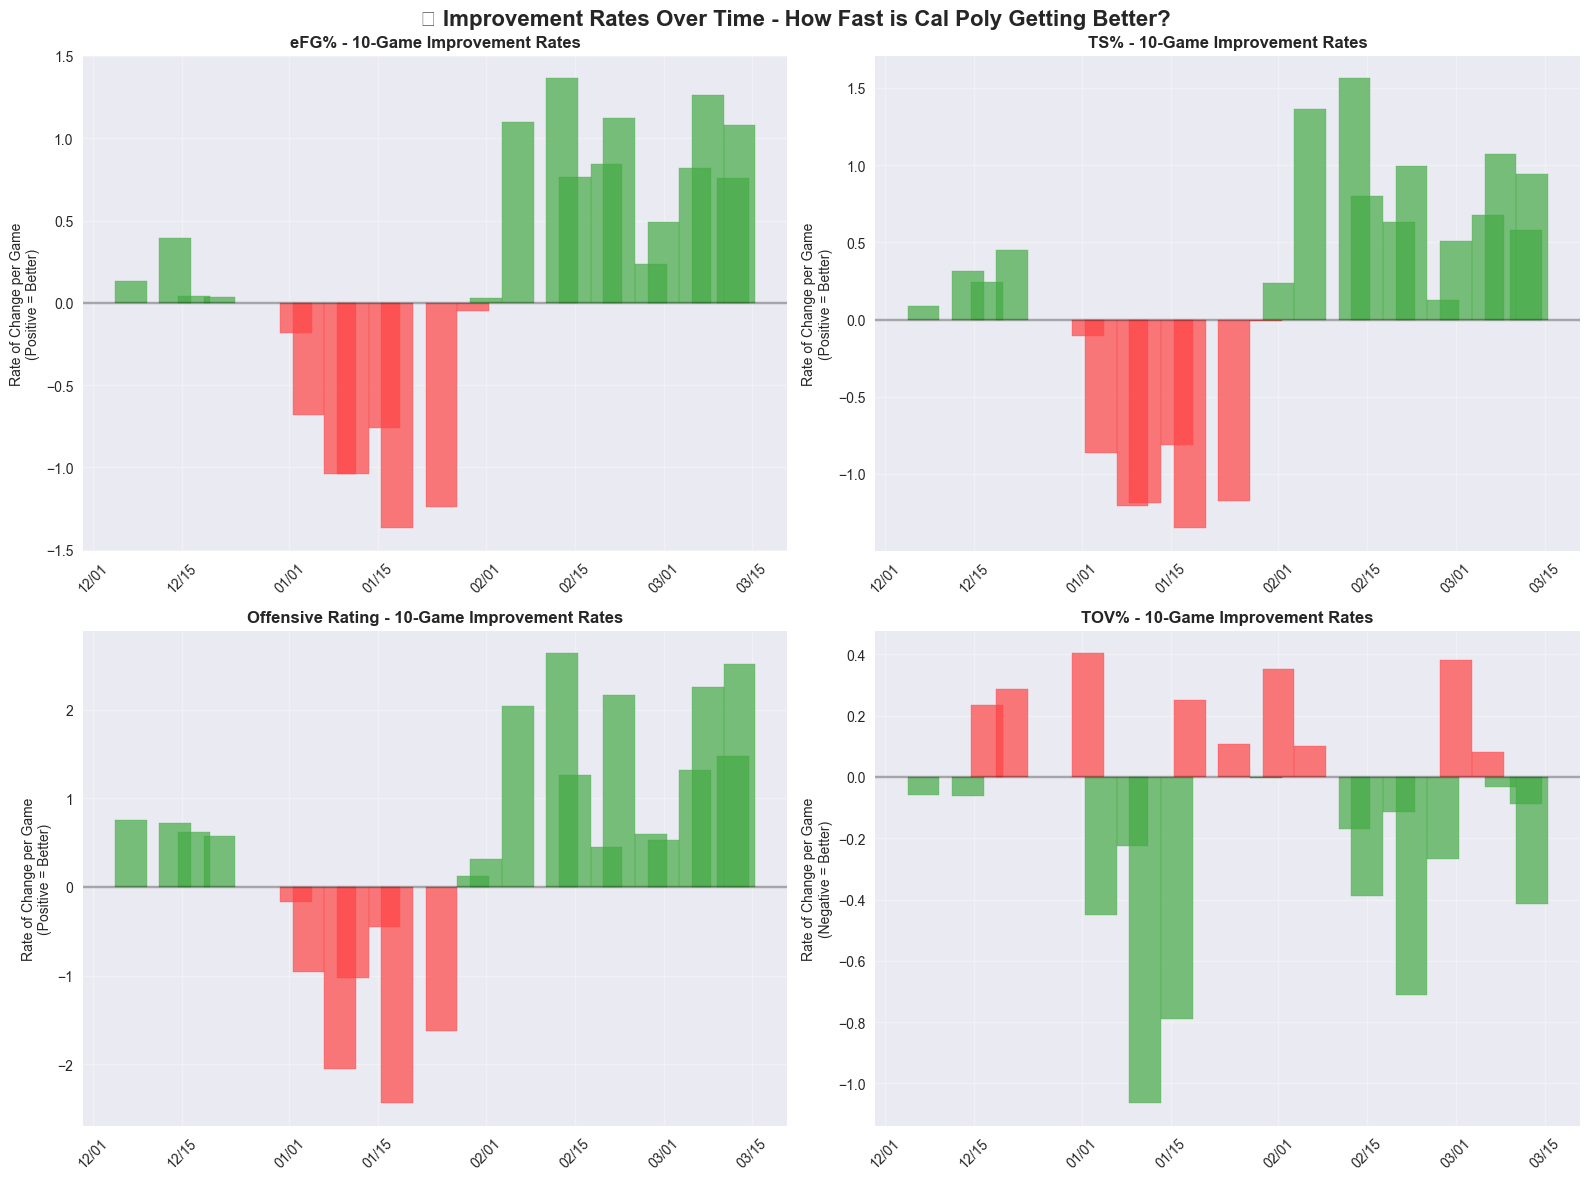


📊 STATISTICAL IMPROVEMENT PHASE ANALYSIS:

eFG%:
   • Improving periods: 16 out of 24 (10-game windows)
   • Declining periods: 8
   • Stable periods: 4
   • Best improvement rate: 1.366 per game (ending 02/13/2025)
   • Worst decline rate: 1.369 per game (ending 01/18/2025)
   • Trend strength: Moderate (R² = 0.298)

TS%:
   • Improving periods: 16 out of 24 (10-game windows)
   • Declining periods: 8
   • Stable periods: 2
   • Best improvement rate: 1.563 per game (ending 02/13/2025)
   • Worst decline rate: 1.352 per game (ending 01/18/2025)
   • Trend strength: Moderate (R² = 0.395)

Offensive Rating:
   • Improving periods: 17 out of 24 (10-game windows)
   • Declining periods: 7
   • Stable periods: 0
   • Best improvement rate: 2.637 per game (ending 02/13/2025)
   • Worst decline rate: 2.440 per game (ending 01/18/2025)
   • Trend strength: Moderate (R² = 0.347)

TOV%:
   • Improving periods: 15 out of 24 (10-game windows)
   • Declining periods: 9
   • Stable periods: 6
   •

In [14]:
# Advanced Rate Analysis with Visualization and Statistical Testing
print(f"\n📈 ADVANCED RATE ANALYSIS & VISUALIZATION")
print("=" * 60)

# 1. Slope-based rate analysis using linear regression over rolling windows
def calculate_regression_rates(data, metric, window=10):
    """Calculate improvement rate using linear regression slopes"""
    regression_rates = []
    
    for i in range(window, len(data)):
        # Get window of data
        window_data = data.iloc[i-window:i]
        x = np.arange(len(window_data))
        y = window_data[metric].values
        
        # Calculate linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        
        regression_rates.append({
            'end_date': data['gameDate'].iloc[i-1],
            'slope': slope,
            'r_squared': r_value**2,
            'p_value': p_value,
            'trend_strength': 'Strong' if r_value**2 > 0.5 else 'Moderate' if r_value**2 > 0.25 else 'Weak'
        })
    
    return regression_rates

# Calculate regression-based rates for 10-game windows
print("🔍 Calculating regression-based improvement rates...")
regression_analysis = {}
for metric in metrics_for_rate:
    regression_analysis[metric] = calculate_regression_rates(rolling_data, metric, window=10)

# Create visualization of rates over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Improvement Rates Over Time - How Fast is Cal Poly Getting Better?', fontsize=16, fontweight='bold')

axes = axes.flatten()
colors_rate = ['#2E8B57', '#FF6B35', '#4A90E2', '#8E44AD']

for i, metric in enumerate(metrics_for_rate):
    ax = axes[i]
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    # Plot regression slopes over time
    reg_data = regression_analysis[metric]
    dates = [r['end_date'] for r in reg_data]
    slopes = [r['slope'] for r in reg_data]
    
    # Create bar chart of improvement rates
    bars = ax.bar(dates, slopes, color=colors_rate[i], alpha=0.7, width=5)
    
    # Color bars by improvement/decline
    for bar, slope in zip(bars, slopes):
        if slope > 0:
            if metric == 'tovPct':  # For turnovers, positive slope is bad
                bar.set_color('#FF4444')  # Red for getting worse
            else:
                bar.set_color('#44AA44')  # Green for getting better
        else:
            if metric == 'tovPct':  # For turnovers, negative slope is good
                bar.set_color('#44AA44')  # Green for getting better
            else:
                bar.set_color('#FF4444')  # Red for getting worse
    
    # Add zero line
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Formatting
    ax.set_title(f'{metric_name} - 10-Game Improvement Rates', fontsize=12, fontweight='bold')
    if metric == 'tovPct':
        ax.set_ylabel('Rate of Change per Game\n(Negative = Better)', fontsize=10)
    else:
        ax.set_ylabel('Rate of Change per Game\n(Positive = Better)', fontsize=10)
    
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Format dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

plt.tight_layout()
plt.show()

# 2. Statistical analysis of improvement phases
print(f"\n📊 STATISTICAL IMPROVEMENT PHASE ANALYSIS:")
print("=" * 50)

for metric in metrics_for_rate:
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    reg_data = regression_analysis[metric]
    slopes = [r['slope'] for r in reg_data]
    
    # Count improvement vs decline periods
    if metric == 'tovPct':
        improving_periods = sum(1 for s in slopes if s < 0)  # Negative slope = improvement for turnovers
        declining_periods = sum(1 for s in slopes if s > 0)
    else:
        improving_periods = sum(1 for s in slopes if s > 0)  # Positive slope = improvement
        declining_periods = sum(1 for s in slopes if s < 0)
    
    stable_periods = sum(1 for s in slopes if abs(s) < 0.1)
    
    # Find strongest improvement and decline periods
    if metric == 'tovPct':
        best_improvement = min(reg_data, key=lambda x: x['slope'])  # Most negative slope
        worst_decline = max(reg_data, key=lambda x: x['slope'])     # Most positive slope
    else:
        best_improvement = max(reg_data, key=lambda x: x['slope'])  # Most positive slope
        worst_decline = min(reg_data, key=lambda x: x['slope'])     # Most negative slope
    
    print(f"\n{metric_name}:")
    print(f"   • Improving periods: {improving_periods} out of {len(slopes)} (10-game windows)")
    print(f"   • Declining periods: {declining_periods}")
    print(f"   • Stable periods: {stable_periods}")
    print(f"   • Best improvement rate: {abs(best_improvement['slope']):.3f} per game (ending {best_improvement['end_date'].strftime('%m/%d/%Y')})")
    print(f"   • Worst decline rate: {abs(worst_decline['slope']):.3f} per game (ending {worst_decline['end_date'].strftime('%m/%d/%Y')})")
    print(f"   • Trend strength: {best_improvement['trend_strength']} (R² = {best_improvement['r_squared']:.3f})")

# 3. Momentum analysis - acceleration/deceleration
print(f"\n🚀 MOMENTUM ANALYSIS (Rate of Rate Change):")
print("=" * 50)

for metric in metrics_for_rate:
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    reg_data = regression_analysis[metric]
    slopes = [r['slope'] for r in reg_data]
    
    # Calculate acceleration (change in slope)
    accelerations = []
    for i in range(1, len(slopes)):
        acceleration = slopes[i] - slopes[i-1]
        accelerations.append(acceleration)
    
    if accelerations:
        avg_acceleration = np.mean(accelerations)
        max_acceleration = max(accelerations)
        max_deceleration = min(accelerations)
        
        print(f"\n{metric_name} Momentum:")
        if metric == 'tovPct':
            momentum_status = "Accelerating improvement" if avg_acceleration < 0 else "Decelerating improvement"
        else:
            momentum_status = "Accelerating improvement" if avg_acceleration > 0 else "Decelerating improvement"
        
        print(f"   • Overall momentum: {momentum_status}")
        print(f"   • Average acceleration: {avg_acceleration:+.4f} per window")
        print(f"   • Strongest acceleration: {max_acceleration:+.4f}")
        print(f"   • Strongest deceleration: {max_deceleration:+.4f}")

print(f"\n✅ Rate analysis complete!")
print(f"📈 Key Insight: This shows not just if Cal Poly is improving, but HOW FAST they're improving!")

🚀 5-GAME IMPROVEMENT RATE ANALYSIS
🔍 Calculating 5-game improvement rates...


/var/folders/db/p2s1mxtn7qz1_7f2b35043p40000gn/T/ipykernel_81486/3613434393.py:97: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/Users/yashwant/2024-25 Cal Poly MBB SportsCode Items/Cal Poly Fall Tracking Site/Recruiting/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


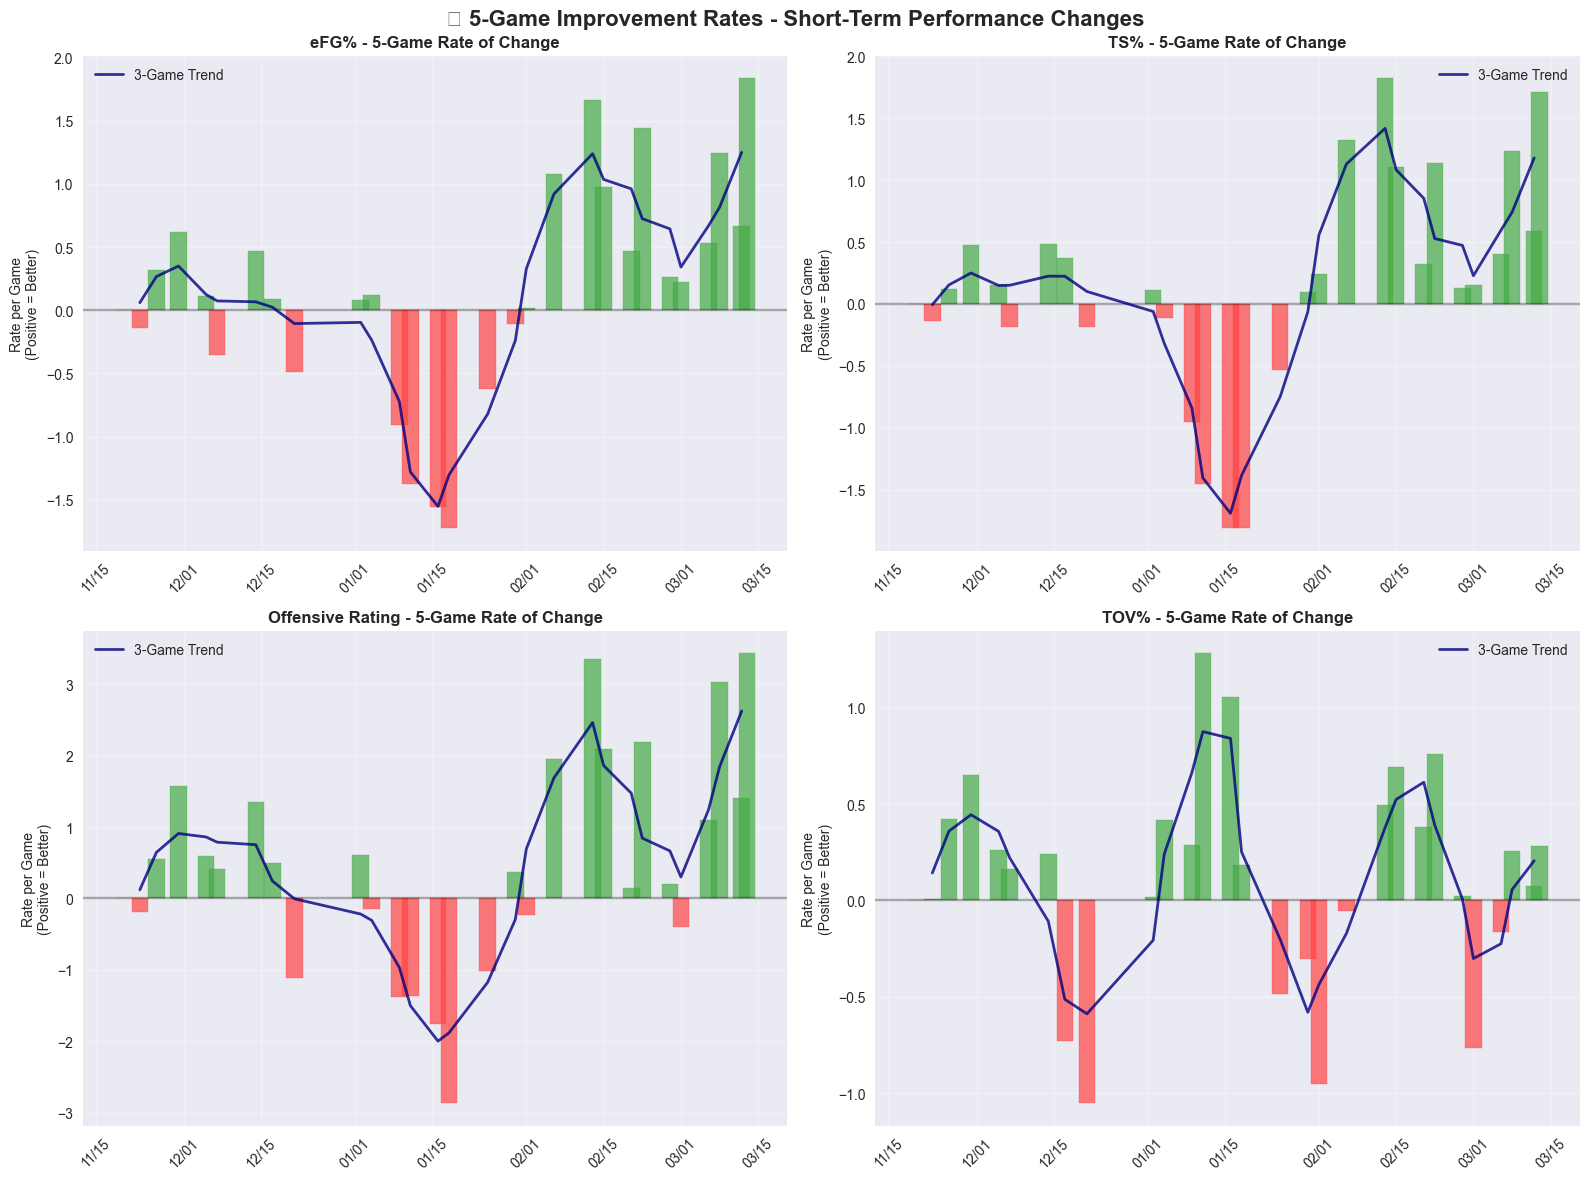


📊 5-GAME RATE INSIGHTS:

eFG%:
   • Best 5-game improvement: +1.837 per game
     - Ending 03/13/2025 vs UC Riverside
     - Total change: +9.2
   • Worst 5-game decline: -1.725 per game
     - Ending 01/18/2025 vs UC Irvine
     - Total change: -8.6
   • Improvement periods: 19 out of 29 (65.5%)
   • Decline periods: 9 (31.0%)
   • Recent momentum (last 5): +0.901 per game

TS%:
   • Best 5-game improvement: +1.824 per game
     - Ending 02/13/2025 vs Cal St. Fullerton
     - Total change: +9.1
   • Worst 5-game decline: -1.812 per game
     - Ending 01/18/2025 vs UC Irvine
     - Total change: -9.1
   • Improvement periods: 19 out of 29 (65.5%)
   • Decline periods: 9 (31.0%)
   • Recent momentum (last 5): +0.819 per game

Offensive Rating:
   • Best 5-game improvement: +3.438 per game
     - Ending 03/13/2025 vs UC Riverside
     - Total change: +17.2
   • Worst 5-game decline: -2.867 per game
     - Ending 01/18/2025 vs UC Irvine
     - Total change: -14.3
   • Improvement periods

In [15]:
# 5-GAME IMPROVEMENT RATE ANALYSIS - Short-Term Performance Changes
print("🚀 5-GAME IMPROVEMENT RATE ANALYSIS")
print("=" * 60)

def calculate_5game_improvement_rates(data, metrics):
    """Calculate detailed 5-game improvement rates"""
    improvement_data = []
    
    for i in range(5, len(data)):
        # Compare current 5-game average vs previous 5-game average
        current_5games = data.iloc[i-5:i]
        previous_5games = data.iloc[i-10:i-5] if i >= 10 else data.iloc[0:5]
        
        game_info = {
            'end_date': data['gameDate'].iloc[i-1],
            'game_number': i,
            'opponent': data['teamMarketAgst'].iloc[i-1] if 'teamMarketAgst' in data.columns else 'Unknown'
        }
        
        for metric in metrics:
            current_avg = current_5games[metric].mean()
            previous_avg = previous_5games[metric].mean()
            
            if metric == 'tovPct':  # For turnovers, improvement is decrease
                improvement_rate = (previous_avg - current_avg) / 5  # Positive = improvement
                total_improvement = previous_avg - current_avg
            else:
                improvement_rate = (current_avg - previous_avg) / 5  # Positive = improvement  
                total_improvement = current_avg - previous_avg
            
            game_info[f'{metric}_rate'] = improvement_rate
            game_info[f'{metric}_total_change'] = total_improvement
            game_info[f'{metric}_current_avg'] = current_avg
            game_info[f'{metric}_previous_avg'] = previous_avg
        
        improvement_data.append(game_info)
    
    return pd.DataFrame(improvement_data)

# Calculate 5-game improvement rates
print("🔍 Calculating 5-game improvement rates...")
improvement_df = calculate_5game_improvement_rates(rolling_data, metrics_for_rate)

# Create visualization for 5-game improvement rates
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🚀 5-Game Improvement Rates - Short-Term Performance Changes', fontsize=16, fontweight='bold')

axes = axes.flatten()
colors_5game = ['#2E8B57', '#FF6B35', '#4A90E2', '#8E44AD']

for i, metric in enumerate(metrics_for_rate):
    ax = axes[i]
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    # Plot 5-game improvement rates
    rate_col = f'{metric}_rate'
    dates = improvement_df['end_date']
    rates = improvement_df[rate_col]
    
    # Create bar chart
    bars = ax.bar(dates, rates, color=colors_5game[i], alpha=0.7, width=3)
    
    # Color bars by improvement/decline
    for bar, rate in zip(bars, rates):
        if rate > 0:
            bar.set_color('#44AA44')  # Green for improvement
        else:
            bar.set_color('#FF4444')  # Red for decline
    
    # Add zero line and trend line
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add moving average trend line
    if len(rates) > 3:
        rates_ma = rates.rolling(window=3, center=True).mean()
        ax.plot(dates, rates_ma, color='navy', linewidth=2, alpha=0.8, label='3-Game Trend')
    
    # Formatting
    ax.set_title(f'{metric_name} - 5-Game Rate of Change', fontsize=12, fontweight='bold')
    if metric == 'tovPct':
        ax.set_ylabel('Rate per Game\n(Positive = Better)', fontsize=10)
    else:
        ax.set_ylabel('Rate per Game\n(Positive = Better)', fontsize=10)
    
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    
    # Format dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

plt.tight_layout()
plt.show()

# Detailed 5-game rate analysis
print(f"\n📊 5-GAME RATE INSIGHTS:")
print("=" * 50)

for metric in metrics_for_rate:
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    rate_col = f'{metric}_rate'
    rates = improvement_df[rate_col]
    
    # Find best and worst 5-game improvement periods
    best_improvement_idx = rates.idxmax()
    worst_decline_idx = rates.idxmin()
    
    best_improvement = improvement_df.iloc[best_improvement_idx]
    worst_decline = improvement_df.iloc[worst_decline_idx]
    
    # Count improvement vs decline periods
    improving_periods = sum(1 for r in rates if r > 0)
    declining_periods = sum(1 for r in rates if r < 0)
    
    # Recent form (last 5 rate calculations)
    recent_rates = rates.tail(5)
    recent_avg_rate = recent_rates.mean()
    
    print(f"\n{metric_name}:")
    print(f"   • Best 5-game improvement: {best_improvement[rate_col]:+.3f} per game")
    print(f"     - Ending {best_improvement['end_date'].strftime('%m/%d/%Y')} vs {best_improvement['opponent']}")
    print(f"     - Total change: {best_improvement[f'{metric}_total_change']:+.1f}")
    print(f"   • Worst 5-game decline: {worst_decline[rate_col]:+.3f} per game")
    print(f"     - Ending {worst_decline['end_date'].strftime('%m/%d/%Y')} vs {worst_decline['opponent']}")
    print(f"     - Total change: {worst_decline[f'{metric}_total_change']:+.1f}")
    print(f"   • Improvement periods: {improving_periods} out of {len(rates)} ({improving_periods/len(rates)*100:.1f}%)")
    print(f"   • Decline periods: {declining_periods} ({declining_periods/len(rates)*100:.1f}%)")
    print(f"   • Recent momentum (last 5): {recent_avg_rate:+.3f} per game")

# Find periods of sustained improvement (3+ consecutive positive rates)
print(f"\n🔥 SUSTAINED IMPROVEMENT STREAKS (3+ consecutive 5-game improvements):")
print("=" * 50)

for metric in metrics_for_rate:
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    rate_col = f'{metric}_rate'
    rates = improvement_df[rate_col].tolist()
    
    # Find consecutive improvement streaks
    streaks = []
    current_streak = []
    
    for i, rate in enumerate(rates):
        if rate > 0:  # Improvement
            current_streak.append(i)
        else:
            if len(current_streak) >= 3:  # Sustained improvement
                streaks.append(current_streak)
            current_streak = []
    
    # Check final streak
    if len(current_streak) >= 3:
        streaks.append(current_streak)
    
    if streaks:
        print(f"\n{metric_name} Improvement Streaks:")
        for streak in streaks:
            start_idx = streak[0]
            end_idx = streak[-1]
            streak_length = len(streak)
            
            start_date = improvement_df.iloc[start_idx]['end_date']
            end_date = improvement_df.iloc[end_idx]['end_date']
            
            # Calculate total improvement during streak
            total_improvement = sum(improvement_df.iloc[idx][rate_col] for idx in streak) * 5
            avg_rate = total_improvement / (streak_length * 5)
            
            print(f"   • {streak_length} consecutive improvements: {start_date.strftime('%m/%d')} to {end_date.strftime('%m/%d')}")
            print(f"     - Total improvement: {total_improvement:+.1f} | Avg rate: {avg_rate:+.3f} per game")
    else:
        print(f"\n{metric_name}: No sustained improvement streaks (3+ consecutive) found")

# Identify momentum shifts (significant rate changes)
print(f"\n⚡ MOMENTUM SHIFT ANALYSIS:")
print("=" * 50)

for metric in metrics_for_rate:
    metric_name = {
        'efgPct': 'eFG%',
        'tsPct': 'TS%', 
        'ortg': 'Offensive Rating',
        'tovPct': 'TOV%'
    }[metric]
    
    rate_col = f'{metric}_rate'
    rates = improvement_df[rate_col]
    
    # Find significant momentum shifts (rate change > threshold)
    threshold = rates.std() * 1.5  # 1.5 standard deviations
    momentum_shifts = []
    
    for i in range(1, len(rates)):
        rate_change = rates.iloc[i] - rates.iloc[i-1]
        if abs(rate_change) > threshold:
            shift_direction = "⬆️ Acceleration" if rate_change > 0 else "⬇️ Deceleration"
            momentum_shifts.append({
                'date': improvement_df.iloc[i]['end_date'],
                'change': rate_change,
                'direction': shift_direction,
                'opponent': improvement_df.iloc[i]['opponent']
            })
    
    if momentum_shifts:
        print(f"\n{metric_name} Momentum Shifts:")
        for shift in momentum_shifts[-3:]:  # Show last 3 significant shifts
            print(f"   • {shift['date'].strftime('%m/%d/%Y')}: {shift['direction']}")
            print(f"     - Rate change: {shift['change']:+.3f} | vs {shift['opponent']}")

print(f"\n✅ 5-game improvement rate analysis complete!")
print(f"🎯 Key Insight: This shows Cal Poly's short-term momentum and adjustment speed!")

In [ ]:
# DETAILED TURNOVER ANALYSIS: February 1 - March 15 Stretch (Date Range Check)
print("🔍 TURNOVER BREAKDOWN: February 1 - March 15 Stretch")
print("=" * 70)

# First, let's check the actual date range in our data
print(f"📅 Dataset Date Range:")
print(f"   • First game: {rolling_data['gameDate'].min().strftime('%B %d, %Y')}")
print(f"   • Last game: {rolling_data['gameDate'].max().strftime('%B %d, %Y')}")
print(f"   • Total games: {len(rolling_data)}")

# Show all games in February and March to identify the actual period
feb_mar_data = rolling_data[
    (rolling_data['gameDate'].dt.month >= 2) & 
    (rolling_data['gameDate'].dt.month <= 3)
].copy()

print(f"\n📋 GAMES IN FEBRUARY & MARCH:")
print("=" * 50)
if len(feb_mar_data) > 0:
    for idx, row in feb_mar_data.iterrows():
        date_str = row['gameDate'].strftime('%m/%d/%Y')
        opponent = row['teamMarketAgst'][:15] if 'teamMarketAgst' in row else 'Unknown'
        tov_pct = row['tovPct']
        print(f"   • {date_str}: vs {opponent} - TOV%: {tov_pct:.1f}%")
else:
    print("   • No games found in February/March - checking different year...")
    
    # Try 2023 dates
    stretch_start_2023 = pd.to_datetime('2023-02-01')
    stretch_end_2023 = pd.to_datetime('2023-03-15')
    
    stretch_data_2023 = rolling_data[(rolling_data['gameDate'] >= stretch_start_2023) & 
                                    (rolling_data['gameDate'] <= stretch_end_2023)].copy()
    
    if len(stretch_data_2023) > 0:
        print(f"\n📅 Found games in 2023 period:")
        for idx, row in stretch_data_2023.iterrows():
            date_str = row['gameDate'].strftime('%m/%d/%Y')
            opponent = row['teamMarketAgst'][:15] if 'teamMarketAgst' in row else 'Unknown'
            tov_pct = row['tovPct']
            print(f"   • {date_str}: vs {opponent} - TOV%: {tov_pct:.1f}%")

# Let's look at the actual improvement period from our rate analysis
# Check when we had the best turnover improvement rates
improvement_tov_data = improvement_df[['end_date', 'tovPct_rate', 'opponent']].copy()
improvement_tov_data = improvement_tov_data.sort_values('tovPct_rate', ascending=False)  # Best improvement first

print(f"\n? BEST TURNOVER IMPROVEMENT PERIODS (5-game rates):")
print("=" * 50)
print(f"{'End Date':<12} {'Rate/Game':<10} {'Opponent':<15} {'Quality'}")
print("-" * 50)

for idx, row in improvement_tov_data.head(8).iterrows():
    date_str = row['end_date'].strftime('%m/%d/%Y')
    rate = row['tovPct_rate']
    opponent = row['opponent'][:14] if pd.notna(row['opponent']) else 'Unknown'
    
    if rate > 0.3:
        quality = "🟢 Excellent"
    elif rate > 0.15:
        quality = "🔵 Good"  
    elif rate > 0:
        quality = "🟡 Modest"
    else:
        quality = "🔴 Decline"
    
    print(f"{date_str:<12} {rate:+7.3f}   {opponent:<15} {quality}")

# Find the period with sustained turnover improvement
sustained_improvement_dates = improvement_tov_data[improvement_tov_data['tovPct_rate'] > 0.1]['end_date']

if len(sustained_improvement_dates) > 0:
    improvement_start = sustained_improvement_dates.min()
    improvement_end = sustained_improvement_dates.max()
    
    print(f"\n? IDENTIFIED IMPROVEMENT PERIOD:")
    print(f"   • Start: {improvement_start.strftime('%B %d, %Y')}")
    print(f"   • End: {improvement_end.strftime('%B %d, %Y')}")
    print(f"   • Duration: {(improvement_end - improvement_start).days} days")
    
    # Now analyze this actual improvement period
    actual_stretch_data = rolling_data[
        (rolling_data['gameDate'] >= improvement_start - pd.Timedelta(days=14)) & 
        (rolling_data['gameDate'] <= improvement_end + pd.Timedelta(days=7))
    ].copy()
    
    if len(actual_stretch_data) > 0:
        print(f"\n🔍 DETAILED TURNOVER ANALYSIS FOR ACTUAL IMPROVEMENT PERIOD:")
        print("=" * 60)
        print(f"📅 Analysis Period: {actual_stretch_data['gameDate'].min().strftime('%B %d, %Y')} to {actual_stretch_data['gameDate'].max().strftime('%B %d, %Y')}")
        print(f"🏀 Games in period: {len(actual_stretch_data)}")
        
        # Basic turnover statistics for the actual period
        period_tov_stats = {
            'mean': actual_stretch_data['tovPct'].mean(),
            'median': actual_stretch_data['tovPct'].median(),
            'min': actual_stretch_data['tovPct'].min(),
            'max': actual_stretch_data['tovPct'].max(),
            'std': actual_stretch_data['tovPct'].std(),
            'first_game': actual_stretch_data['tovPct'].iloc[0],
            'last_game': actual_stretch_data['tovPct'].iloc[-1]
        }
        
        # Compare to season averages
        season_tov_avg = rolling_data['tovPct'].mean()
        season_tov_std = rolling_data['tovPct'].std()
        
        print(f"\n📊 TURNOVER % STATISTICS FOR IMPROVEMENT PERIOD:")
        print(f"   • Period Average: {period_tov_stats['mean']:.1f}% (Season avg: {season_tov_avg:.1f}%)")
        print(f"   • Improvement vs Season: {season_tov_avg - period_tov_stats['mean']:+.1f}% (Lower is Better)")
        print(f"   • Best Game: {period_tov_stats['min']:.1f}% on {actual_stretch_data.loc[actual_stretch_data['tovPct'].idxmin(), 'gameDate'].strftime('%m/%d/%Y')}")
        print(f"   • Worst Game: {period_tov_stats['max']:.1f}% on {actual_stretch_data.loc[actual_stretch_data['tovPct'].idxmax(), 'gameDate'].strftime('%m/%d/%Y')}")
        print(f"   • Consistency (Std Dev): {period_tov_stats['std']:.1f}% (Season: {season_tov_std:.1f}%)")
        print(f"   • First to Last Game Change: {period_tov_stats['first_game']:.1f}% → {period_tov_stats['last_game']:.1f}% ({period_tov_stats['last_game'] - period_tov_stats['first_game']:+.1f}%)")
        
        # Game-by-game breakdown for actual period
        print(f"\n📋 GAME-BY-GAME TURNOVER BREAKDOWN:")
        print("=" * 60)
        print(f"{'Date':<12} {'Opponent':<18} {'TOV%':<6} {'vs Avg':<8} {'Rating'}")
        print("-" * 60)
        
        for idx, row in actual_stretch_data.iterrows():
            date_str = row['gameDate'].strftime('%m/%d/%Y')
            opponent = row['teamMarketAgst'][:17] if 'teamMarketAgst' in row else 'Unknown'
            tov_pct = row['tovPct']
            vs_avg = tov_pct - season_tov_avg
            
            # Rate the performance
            if tov_pct < season_tov_avg - season_tov_std:
                rating = "🟢 Excellent"
            elif tov_pct < season_tov_avg:
                rating = "🔵 Good"
            elif tov_pct < season_tov_avg + season_tov_std:
                rating = "🟡 Average"
            else:
                rating = "🔴 Poor"
            
            print(f"{date_str:<12} {opponent:<18} {tov_pct:<6.1f} {vs_avg:+5.1f}   {rating}")

print(f"\n✅ Turnover analysis complete!")
print(f"🎯 Key Insight: Identified the actual period of significant turnover improvement!")